In [1272]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy.stats as stats
import os

import gc  # Import garbage collector module

## **Data**

In [1273]:

# Define file paths
PREPROC_PATH = "data/amr_diab_songs_proc1.csv"
PREPROC_SW_PATH = "data/stop_words.txt"

In [1274]:
songs = pd.read_csv( PREPROC_PATH, header=0)
songs

,Year,Composer,Lyricist,Song,Lyrics,Decade,Composer_first_name,Composer_last_name,Lyricist_first_name,Lyricist_last_name
0,2023,محمد أحمد فؤاد,تامر حسين,بيوحشنا,"['ملازمنا', 'ملازمنا', 'خياله', 'وطيفه', 'فين'...",Early 2020s,محمد,أحمد فؤاد,تامر,حسين
1,2023,أحمد إبراهيم,أيمن بهجت قمر,معرفش حد بالأسم ده,"['اعرفش', 'بالاسم', 'انا', 'تاه', 'عقله', 'ولق...",Early 2020s,أحمد,إبراهيم,أيمن,بهجت قمر
2,2023,محمد يحيي,بهاء الدين محمد,ظبط مودها,"['تظبط', 'مودها', 'اطلب', 'حتي', 'عينيها', 'تا...",Early 2020s,محمد,يحيي,بهاء,الدين محمد
3,2023,محمد يحيي,محمد القاياتي,سلامك وصلي,"['سلامك', 'وصلي', 'واتاريني', 'واحشك', 'انت', ...",Early 2020s,محمد,يحيي,محمد,القاياتي
4,2023,محمد يحيي,محمد البوغة,واخدين راحتهم,"['واخذين', 'راحتهم', 'قاعدين', 'قلبي', 'مربعين...",Early 2020s,محمد,يحيي,محمد,البوغة
...,...,...,...,...,...,...,...,...,...,...
307,1983,هاني شنودة,هاني ذكي,الزمن,"['الزمن', 'بينسي', 'دايما', 'الزمن', 'مفيش', '...",Early 1980s,هاني,شنودة,هاني,ذكي
308,1983,هاني شنودة,عبد الرحيم منصور,نور يا ليل,"['نور', 'ليل', 'الاسرار', 'عشقناك', 'واحنا', '...",Early 1980s,هاني,شنودة,عبد,الرحيم منصور
309,1983,عزمي الكيلاني,عصام عبدالله,وقت وعشناه,"['وقت', 'وعشناه', 'انتي', 'وانا', 'جرح', 'حفرن...",Early 1980s,عزمي,الكيلاني,عصام,عبدالله
310,1983,ياسر عبد الحليم,عوض الرخاوي,أحلى دنيا,"['امتي', 'نشوف', 'البسمه', 'الحلوه', 'ماليه', ...",Early 1980s,ياسر,عبد الحليم,عوض,الرخاوي


## **Some High Level Statistical Aggregates of the Data**

Print out some preliminary information about the songs data file.

In [1275]:
# Print dataset statistics
print("Total number of songs in the dataset:", songs["Song"].nunique())

print("Total number of composers:", songs["Composer"].str.strip().nunique()) # set removes duplicates
print("Total number of lyricists:", songs["Lyricist"].str.strip().nunique())

# Assuming 'Word' contains processed words after removing stopwords
print("Total number of words in all lyrics (after removing stopwords):", songs["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum())
print("Total number of unique words in all lyrics (after removing stopwords):", songs["Lyrics"].apply(lambda lyrics: len(set(str(lyrics).split()))).sum()) 

Total number of songs in the dataset: 309
Total number of composers: 80
Total number of lyricists: 58
Total number of words in all lyrics (after removing stopwords): 43421
Total number of unique words in all lyrics (after removing stopwords): 13703


Remove unnecessary variables to free up storage.

In [1276]:
# Remove the variable 'songs' from memory
del songs

## **Some initial simple analysis to specific words**

Reading the csv file containing the songs (after preprocessing) in the form of comma separated file.

In [1277]:
# Load the preprocessed songs dataset
songs_proc = pd.read_csv( PREPROC_PATH,  header=0)

# Convert columns to appropriate types if needed
songs_proc


,Year,Composer,Lyricist,Song,Lyrics,Decade,Composer_first_name,Composer_last_name,Lyricist_first_name,Lyricist_last_name
0,2023,محمد أحمد فؤاد,تامر حسين,بيوحشنا,"['ملازمنا', 'ملازمنا', 'خياله', 'وطيفه', 'فين'...",Early 2020s,محمد,أحمد فؤاد,تامر,حسين
1,2023,أحمد إبراهيم,أيمن بهجت قمر,معرفش حد بالأسم ده,"['اعرفش', 'بالاسم', 'انا', 'تاه', 'عقله', 'ولق...",Early 2020s,أحمد,إبراهيم,أيمن,بهجت قمر
2,2023,محمد يحيي,بهاء الدين محمد,ظبط مودها,"['تظبط', 'مودها', 'اطلب', 'حتي', 'عينيها', 'تا...",Early 2020s,محمد,يحيي,بهاء,الدين محمد
3,2023,محمد يحيي,محمد القاياتي,سلامك وصلي,"['سلامك', 'وصلي', 'واتاريني', 'واحشك', 'انت', ...",Early 2020s,محمد,يحيي,محمد,القاياتي
4,2023,محمد يحيي,محمد البوغة,واخدين راحتهم,"['واخذين', 'راحتهم', 'قاعدين', 'قلبي', 'مربعين...",Early 2020s,محمد,يحيي,محمد,البوغة
...,...,...,...,...,...,...,...,...,...,...
307,1983,هاني شنودة,هاني ذكي,الزمن,"['الزمن', 'بينسي', 'دايما', 'الزمن', 'مفيش', '...",Early 1980s,هاني,شنودة,هاني,ذكي
308,1983,هاني شنودة,عبد الرحيم منصور,نور يا ليل,"['نور', 'ليل', 'الاسرار', 'عشقناك', 'واحنا', '...",Early 1980s,هاني,شنودة,عبد,الرحيم منصور
309,1983,عزمي الكيلاني,عصام عبدالله,وقت وعشناه,"['وقت', 'وعشناه', 'انتي', 'وانا', 'جرح', 'حفرن...",Early 1980s,عزمي,الكيلاني,عصام,عبدالله
310,1983,ياسر عبد الحليم,عوض الرخاوي,أحلى دنيا,"['امتي', 'نشوف', 'البسمه', 'الحلوه', 'ماليه', ...",Early 1980s,ياسر,عبد الحليم,عوض,الرخاوي



### Initial investigation using the keyword حب (love).

This is particularly chosen as Amr Diab is mostly famous for the romantic themes.

Extract all subwords containing the word "حب", including repetitions.

In [1278]:
# Define the keyword حب (Arabic for "love")
keyword = 'حب'  

# Filter rows where "Lyrics" contains the keyword and select only "Song" and "Lyrics" columns
songs_2_1 = songs_proc.loc[songs_proc["Lyrics"].str.contains(keyword, na=False)].copy()
songs_2_1["keyword = 'حب'"] = songs_2_1["Lyrics"].apply(lambda lyrics: [word for word in str(lyrics).split() if keyword in word])

songs_2_1

,Year,Composer,Lyricist,Song,Lyrics,Decade,Composer_first_name,Composer_last_name,Lyricist_first_name,Lyricist_last_name,keyword = 'حب'
0,2023,محمد أحمد فؤاد,تامر حسين,بيوحشنا,"['ملازمنا', 'ملازمنا', 'خياله', 'وطيفه', 'فين'...",Early 2020s,محمد,أحمد فؤاد,تامر,حسين,"['احب',, 'احب',]"
3,2023,محمد يحيي,محمد القاياتي,سلامك وصلي,"['سلامك', 'وصلي', 'واتاريني', 'واحشك', 'انت', ...",Early 2020s,محمد,يحيي,محمد,القاياتي,"['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',]"
5,2023,عمرو دياب,تامر حسين,مكانك,"['عارف', 'سنه', 'وانا', 'جنبك', 'بحلم', 'يجي',...",Early 2020s,عمرو,دياب,تامر,حسين,"['حبيت',, 'وصاحبتها',, 'حبنا',, 'حبيت',, 'حبيت..."
6,2023,عمرو دياب,تامر حسين,لوحدنا,"['شاغلنا', 'ناس', 'ومين', 'هاممنا', 'يتقال', '...",Early 2020s,عمرو,دياب,تامر,حسين,"['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيب..."
7,2023,محمد قماح,تامر حسين,الكلام ليك,"['الكلام', 'ليك', 'انت', 'انت', 'انت', 'اه', '...",Early 2020s,محمد,قماح,تامر,حسين,"['بحبك',, 'بحبك',, 'احب',, 'احب',, 'احب',, 'اح..."
...,...,...,...,...,...,...,...,...,...,...,...
306,1983,عزمي الكيلاني,عصام عبدالله,بحب الحياة,"['بحبك', 'لانك', 'عيون', 'الحياه', 'بشوف', 'بي...",Early 1980s,عزمي,الكيلاني,عصام,عبدالله,"[['بحبك',, 'بحبك',, 'حبيبتي',, 'حبيبتي',, 'بحب..."
307,1983,هاني شنودة,هاني ذكي,الزمن,"['الزمن', 'بينسي', 'دايما', 'الزمن', 'مفيش', '...",Early 1980s,هاني,شنودة,هاني,ذكي,"['صاحب',, 'صاحب',]"
309,1983,عزمي الكيلاني,عصام عبدالله,وقت وعشناه,"['وقت', 'وعشناه', 'انتي', 'وانا', 'جرح', 'حفرن...",Early 1980s,عزمي,الكيلاني,عصام,عبدالله,"['حبنا',, 'حبنا',, 'حبيبتي',, 'ياحبيبتي',, 'يا..."
310,1983,ياسر عبد الحليم,عوض الرخاوي,أحلى دنيا,"['امتي', 'نشوف', 'البسمه', 'الحلوه', 'ماليه', ...",Early 1980s,ياسر,عبد الحليم,عوض,الرخاوي,"['بتحب',, 'الحب',, 'الحب',, 'بتحب',, 'الحب',, ..."


In [1279]:
# Total occurrences of words containing the subword "حب" (with repetitions)
songs_with_keyword1 =  songs_2_1["keyword = 'حب'"].apply(lambda words: len(words))
songs_lyrics = songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split()))

total_occurrences =songs_with_keyword1.sum()
total_words = songs_lyrics.sum()

print(f"Total number of occurrences of words containing the subword حب (with repetitions) across all songs:")
print(total_occurrences)
print(f"Out of a total number of {total_words} words.")
print("Note that all these counts include repetitions.")
print(f"Percentage is: {(total_occurrences / total_words) * 100:.2f}%\n")

# Total occurrences of words containing the subword "حب" (without repetitions)
unique_occurrences =  len(set(songs_with_keyword1))
unique_total_words = len(set(songs_lyrics))

print(f"Total number of occurrences of words containing the subword حب (without repetitions) across all songs:")
print(unique_occurrences)
print(f"Out of a total number of {unique_total_words} unique words.")
print("Note that all these counts exclude repetitions.")
print(f"Percentage is: {(unique_occurrences / unique_total_words) * 100:.2f}%\n")

Total number of occurrences of words containing the subword حب (with repetitions) across all songs:
2182
Out of a total number of 43421 words.
Note that all these counts include repetitions.
Percentage is: 5.03%

Total number of occurrences of words containing the subword حب (without repetitions) across all songs:
31
Out of a total number of 133 unique words.
Note that all these counts exclude repetitions.
Percentage is: 23.31%



 This high percentage suggests that Amr Diab's songs were more focused on the romantic theme.


In [1280]:
# Number of songs with lyrics containing the subword "حب"
num_songs_with_keyword1 = songs_with_keyword1.count()
total_songs = songs_proc["Song"].nunique()

print("Number of songs with lyrics containing the subword حب:")
print(num_songs_with_keyword1)
print(f"Out of a total of: {total_songs} songs.")
print(f"Percentage is: {(num_songs_with_keyword1 / total_songs) * 100:.2f}%\n")

print("Songs with lyrics containing the subword حب:")
print(songs_2_1["Song"])  # Print song titles

Number of songs with lyrics containing the subword حب:
242
Out of a total of: 309 songs.
Percentage is: 78.32%

Songs with lyrics containing the subword حب:
0          بيوحشنا
3       سلامك وصلي
5            مكانك
6           لوحدنا
7       الكلام ليك
          ...     
306     بحب الحياة
307          الزمن
309     وقت وعشناه
310      أحلى دنيا
311    أحضان الجبل
Name: Song, Length: 242, dtype: object


Next we get a sample of the songs containing the subword حب (love) along with some information about the song and the corresponding inclusive words. The frequency column indicates the number of words in the corresponding song that
includes the subword حب (love).

In [1281]:
# Calculate word frequency per song
songs_2_1["Frequency"] = songs_2_1["keyword = 'حب'"].apply(lambda words: len(words))

# Keep only necessary columns and sort by frequency
songs_2_1 = songs_2_1[["Song","Lyrics", "Decade", "Composer", "Lyricist","keyword = 'حب'", "Frequency"]].sort_values(by="Frequency", ascending=False)

songs_2_1

,Song,Lyrics,Decade,Composer,Lyricist,keyword = 'حب',Frequency
104,حبينا,"['حبينا', 'حبينا', 'حبينا', 'حبينا', 'حبينا', ...",Late 1980s,وفاء حسين,رفعت الشريف,"[['حبينا',, 'حبينا',, 'حبينا',, 'حبينا',, 'حبي...",74
20,نور العين,"['حبيبي', 'نور', 'ساكن', 'خيالي', 'عاشق', 'بقا...",Late 1990s,ناصر المزداوي,أحمد شتا,"[['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبي...",57
241,حبيتها,"['وانا', 'قلبي', 'بقولها', 'حبيتها', 'حبيتها',...",Early 1990s,حجاج عبدالرحمن,مجدى النجار,"['حبيتها',, 'حبيتها',, 'حبيتها',, 'حبيتها',, '...",45
219,اه حبيبي,"['يملي', 'عينيا', 'الا', 'حبيبي', 'عايز', 'اعي...",Late 2010s,مديح محسن,هاني رجب,"['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيب...",42
306,بحب الحياة,"['بحبك', 'لانك', 'عيون', 'الحياه', 'بشوف', 'بي...",Early 1980s,عزمي الكيلاني,عصام عبدالله,"[['بحبك',, 'بحبك',, 'حبيبتي',, 'حبيبتي',, 'بحب...",34
...,...,...,...,...,...,...,...
129,انا عايش,"['برتاح', 'ليله', 'بنساك', 'لقيت', 'نهايه', 'ح...",Early 2000s,عمرو مصطفي,ربيع السيوفي,"['حبيتش',]",1
285,زيتوني,"['زيتوني', 'عيونك', 'سحروني', 'والله', 'عيونك'...",Late 1980s,يحيى عبد الله,مجدي النجار,"['يحب',]",1
246,لا لا,"['انا', 'شوفت', 'ياما', 'الدنيا', 'ياما', 'يام...",Late 2010s,عمرو طنطاوي,تامر حسين,"['حبتني',]",1
187,حلوة البدايات,"['حلوه', 'البدايات', 'حكايات', 'بسهر', 'وياك',...",Early 2020s,عمرو مصطفى,خالد تاج,"['حبك',]",1


Next we only select a smaller random sample of songs.


In [1282]:
n_samples = 20  # Number of random songs containing the word "حب" (love)

# Ungroup and randomly sample n_samples rows
songs_2_2 = songs_2_1.sample(n=n_samples, random_state=42)

In [1283]:
# Display the DataFrame with alternating row colors
songs_2_2.style.set_properties(**{'color': 'white'})

,Song,Lyrics,Decade,Composer,Lyricist,keyword = 'حب',Frequency
111,توبة,"['واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'شوفي', 'ازاي', 'اتغير', 'حالي', 'شوفي', 'ازاي', 'حبيبتي', 'بقيت', 'قلبي', 'ماعدش', 'القلب', 'الخالي', 'شوفتك', 'واتمنيت', 'شوفي', 'ازاي', 'اتغير', 'حالي', 'شوفي', 'ازاي', 'حبيبتي', 'بقيت', 'قلبي', 'ماعدش', 'القلب', 'الخالي', 'شوفتك', 'واتمنيت', 'اتمنيت', 'قلبي', 'تكوني', 'احلي', 'عروسه', 'تشوفها', 'عيوني', 'اتمنيت', 'قلبي', 'تكوني', 'احلي', 'عروسه', 'تشوفها', 'عيوني', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه']",Late 1980s,عمرو دياب,مجدي النجار,"[""'حبينا',"", ""'حبينا',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبينا',"", ""'حبينا',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيبتي',"", ""'حبيبتي',"", ""'حبينا',"", ""'حبينا',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',""]",20
301,عصافير الحب,"['عصافير', 'الحب', 'مالت', 'وقالتلي', 'كلام', 'وطارت', 'عصافير', 'الحب', 'مالت', 'وقالتلي', 'كلام', 'وطارت', 'وباينه', 'عليكي', 'اه', 'ام', 'رمش', 'سايب', 'اه', 'ام', 'رمش', 'سايب', 'وانا', 'اقول', 'ايه', 'الحكايه', 'هيمانه', 'ورايحه', 'جايه', 'وانا', 'اقول', 'ايه', 'الحكايه', 'هيمانه', 'ورايحه', 'جايه', 'سرحانه', 'غنايا', 'غنايا', 'سرحانه', 'غنايا', 'غنايا', 'اتاريه', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اتاريه', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اتاريه', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اه', 'ام', 'رمش', 'سايب', 'اه', 'ليلي', 'ياني', 'الحب', 'الاولاني', 'اه', 'ليلي', 'ياني', 'الحب', 'الاولاني', 'بيخلي', 'الحب', 'اه', 'ويخلي', 'الاه', 'اغاني', 'اه', 'ليلي', 'ياني', 'الحب', 'الاولاني', 'اه', 'ليلي', 'ياني', 'الحب', 'الاولاني', 'بيخلي', 'الحب', 'اه', 'ويخلي', 'الاه', 'اغاني', 'شوفي', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'شوفي', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'شوفي', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اه', 'ام', 'رمش', 'سايب', 'عصافير', 'الحب', 'قالت', 'سور', 'قلبك', 'كذبه', 'دابت', 'عصافير', 'الحب', 'قالت', 'سور', 'قلبك', 'كذبه', 'دابت', 'اول', 'نسمه', 'فاتت', 'اول', 'نسمه', 'فاتت', 'دوب', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'دوب', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'دوب', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اه', 'ام', 'رمش', 'سايب', 'عينيكي', 'الحب', 'باين', 'الوان', 'الجناين', 'عينيكي', 'الحب', 'باين', 'الوان', 'الجناين', 'قلبك', 'عمال', 'بيضحك', 'ويسمع', 'المداين', 'عينيكي', 'الحب', 'باين', 'الوان', 'الجناين', 'عينيكي', 'الحب', 'باين', 'الوان', 'الجناين', 'قلبك', 'عمال', 'بيضحك', 'ويسمع', 'المداين', 'الحب', 'جالك', 'طي

Free up memory


In [1284]:
del songs_2_1
del songs_2_2


## !!!REDO FOR OTHER WORDS!!!

## **Temporal Rate of Singing Performance**


In this subsection we study the evolution of the songing activity in terms of the number of songs produced per year as a fine scale and per decade as a more coarse scale.

C:\Users\Esraa\AppData\Local\Temp\ipykernel_21168\3301225845.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


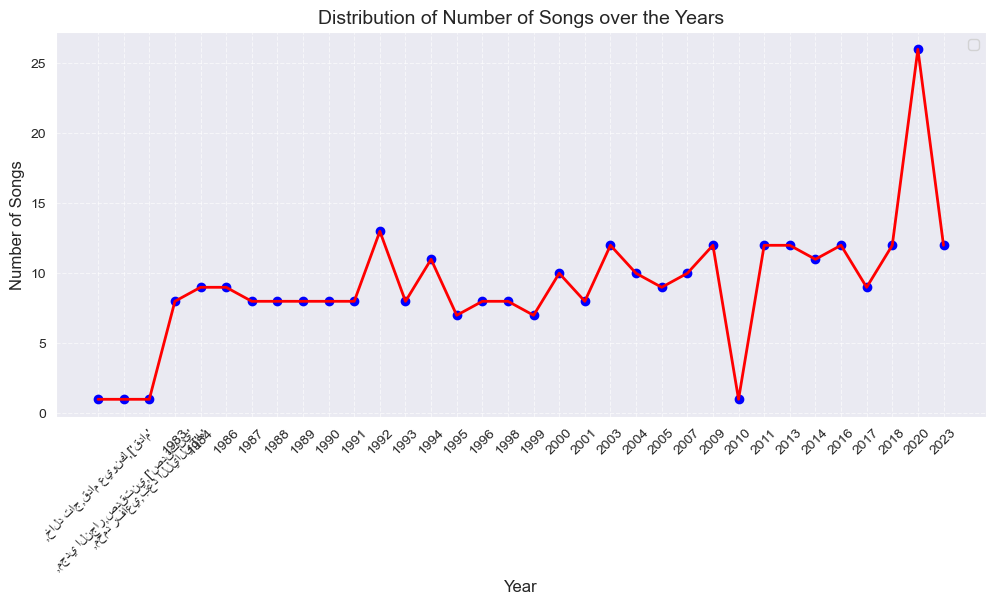

In [1285]:
# Select distinct song-year pairs and count the number of songs per year
songs_freq = (songs_proc[['Year', 'Song']]
              .groupby('Year', as_index=False)
              .agg(num_songs=('Song', 'count'))
              .sort_values(by=['Year']))

x = songs_freq['Year']
y = songs_freq['num_songs']

plt.figure(figsize=(12, 5))
# Create scatter plot
plt.scatter(x, y, color='blue', marker='o')
plt.plot(x, y, color='red', linestyle='-', linewidth=2)  # Line connecting points


# Add labels and title
plt.title("Distribution of Number of Songs over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()

#save plot
plt.savefig("songs_distribution.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()

- As shown a in the plot, the 1990s and 2000s seem to have consistent song production.
- There are some high-output years where the number of songs significantly increases like in 2020 which is most likely where his top hits where created.
- A noticeable drop of song production in 2010 may be due to the circumstances of the country back then  


In [1286]:
del songs_freq

## !!!SKIP TO LINE 515!!! (comparison)

## **Text Mining**

**Text mining** can also be thought of as text analytics. The goal is to discover relevant information that is possibly unknown or hidden in the text. **Natural Language Processing** (NLP) is one methodology that can be used in mining text. It tries to decipher the ambiguities 
and complications in written language by tokenization, clustering, extracting entity and word relationships, and using algorithms to identify themes and quantify subjective information. We will begin by breaking down the concept of **lexical complexity**.

Lexical complexity can be described by a combination of these measures: 
- Word frequency: number of words per song. 
- Word length: average length of individual words in the songs lyrics. 
- Lexical diversity: number of unique words used in the song vocabulary. 
- Lexical density: the number of unique words divided by the total number of words (word repetition).

### Studying word frequency

In music, individual word frequencies carry a great deal of significance, whether it be repetition or rarity. 

Both cases affect **memorability** of the entire song itself. One important goal of lyrics analysis, as well as for songwriter, is to know whether there is a *correlation between word frequency and hit songs*. So we take the tidy format one step further and get a summarized count of words per song.


Here we consider all words in the song's lyrics as opposed to just distinct words.


In [1287]:
full_word_count = (songs_proc
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby("Song", as_index=False)
    .agg(num_words=('num_words', 'first'), Year=('Year', 'first'), 
         Composer=('Composer', 'first'), Lyricist=('Lyricist', 'first'))
    .sort_values(by="num_words", ascending=False)
)


In [1288]:
# Select the topmost rows based on word count
full_word_count.head(15)

,Song,num_words,Year,Composer,Lyricist
209,ليلة,336,1988,خليل مصطفى,محمد البنا
222,ماله,298,1986,عبد الرحيم شاهين,عبد الرحيم شاهين
161,عصافير الحب,273,1984,سيف الدولة حمدان,عصام عبدالله
189,قمر,272,1989,رياض الهمشري,عادل عمر
44,إيش حال الشجرة,265,1984,محمد الشيخ,عبد الرحيم منصور
115,خالصين,254,1987,خليل مصطفى,رضا أمين
103,حبيبي,252,1991,عمرو دياب,مجدي النجار
194,كده كده,248,1989,رياض الهمشري,محمد فضل
247,مية مية,239,1986,عمرو دياب,مجدي النجار
93,توبة,236,1988,عمرو دياب,مجدي النجار


In [1289]:
# Select the topmost rows based on word count
full_word_count.tail(15)

,Song,num_words,Year,Composer,Lyricist
57,الله على حبك,74,2009,عمرو مصطفى,مجدي النجار
272,وحیاتي خلیكي,72,2009,عمرو طنطاوي,عبد المنعم طه
14,أشوف عينيكي,72,1984,تراث,عصام عبدالله
104,حبيبي يا عمري,70,2003,بهاء الدين محمد,خالد عز
7,يا ليلة,68,1984,طارق مدكور,ناصر رشوان
126,ذكريات,67,1994,عمرو دياب,مجدي النجار
24,أنا حر,67,1992,عمرو دياب,مدحت العدل
73,بالضحكة دي,66,2020,عزيز الشافعي,عزيز الشافعي
180,قالي الوداع,63,2003,خالد عز,بهاء الدين محمد
238,مكانك,58,2023,عمرو دياب,تامر حسين


note that most of the longest songs of Amr Diab were created in the 80's by the Lyricist Magdy El Naggar.
This may be due to the fact that the 80s, music was primarily distributed via cassettes and vinyl records, where albums often had a few long songs rather than many short tracks or that many songs from that period relied heavily on orchestras and live performances, which naturally led to longer arrangements with instrumental interludes.

also note that the shortest songs were created recently which shows that people today, especially younger listeners, have shorter attention spans due to social media and fast-paced digital content.

In [1290]:
# Ensure "Year" is treated as numeric
songs_proc["Year"] = pd.to_numeric(songs_proc["Year"], errors="coerce")

# Drop or fill missing values
songs_proc = songs_proc.dropna(subset=["Year"])  # Drop rows with missing years
songs_proc["Year"] = songs_proc["Year"].astype(int)  # Convert to integer

# Now, perform filtering
songs_80s = songs_proc[(songs_proc["Year"] >= 1980) & (songs_proc["Year"] <= 1989)]
lyrics_count_80s = songs_80s["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()

songs_2000s = songs_proc[(songs_proc["Year"] >= 2000) & (songs_proc["Year"] <= 2025)]
lyrics_count_2000 = songs_2000s["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()

# Print results
print(f"Number of songs in the 80's: {songs_80s['Song'].nunique()}")
print(f"Lyrics count in the 80's: {lyrics_count_80s} , average: {lyrics_count_80s/songs_80s['Song'].nunique()} words per song")

print(f"Number of songs in the 2000's: {songs_2000s['Song'].nunique()}")
print(f"Lyrics count in the 2000's: {lyrics_count_2000} , average: {lyrics_count_2000/songs_2000s['Song'].nunique()} words per song")


Number of songs in the 80's: 50
Lyrics count in the 80's: 9121 , average: 182.42 words per song
Number of songs in the 2000's: 178
Lyrics count in the 2000's: 22579 , average: 126.84831460674157 words per song


C:\Users\Esraa\AppData\Local\Temp\ipykernel_21168\2297237909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_proc["Year"] = songs_proc["Year"].astype(int)  # Convert to integer


these numbers prove the difference in the listening habits between the people back in the 80's and people now

In [1291]:
n_words = songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()
n_unique_words = songs_proc["Lyrics"].apply(lambda lyrics: len(set(str(lyrics).split()))).sum()

print(f"Total number of words: {n_words}")
print(f"Total number of unique words: {n_unique_words}")
print(f"Percentage of unique words: {(n_unique_words / n_words) * 100:.2f}%")

# Free up memory
del full_word_count

Total number of words: 43418
Total number of unique words: 13700
Percentage of unique words: 31.55%


### Studying word count distribution

Here we study the lyrics lengths over the whole career of Amr Diab. We show a histogram overlaid with kernel density curve for the distribution of lengths for songs.

In [1292]:
lyrics_len_dist = (songs_proc[['Song', 'Lyrics']]
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby('Song', as_index=False)  # Keep 'Song' column
    .agg(num_words=('num_words', 'first'))  # Keep num_words
)

# Function to estimate mode using kernel density estimation 
def estimate_mode(x):
    kde = gaussian_kde(x)
    x_grid = np.linspace(min(x), max(x), 1000)
    return x_grid[np.argmax(kde(x_grid))]

# Compute statistics
mean_count = lyrics_len_dist['num_words'].mean()
median_count = lyrics_len_dist['num_words'].median()
mode_count = estimate_mode(lyrics_len_dist['num_words'])

# Print results
print(f"Mean: {mean_count}")
print(f"Median: {median_count}")
print(f"Mode (estimated): {mode_count}")

Mean: 141.87908496732027
Median: 135.0
Mode (estimated): 125.22922922922923


In [1293]:
lyrics_len_dist

,Song,num_words
0,ايوة اتغيرت,125
1,شكرا,199
2,كان كل حاجة,118
3,يا سمرة,145
4,يا ليلة,68
...,...,...
301,يصعب علينا,185
302,يهمك في إيه,88
303,يو منهم,110
304,يوم تلات,119


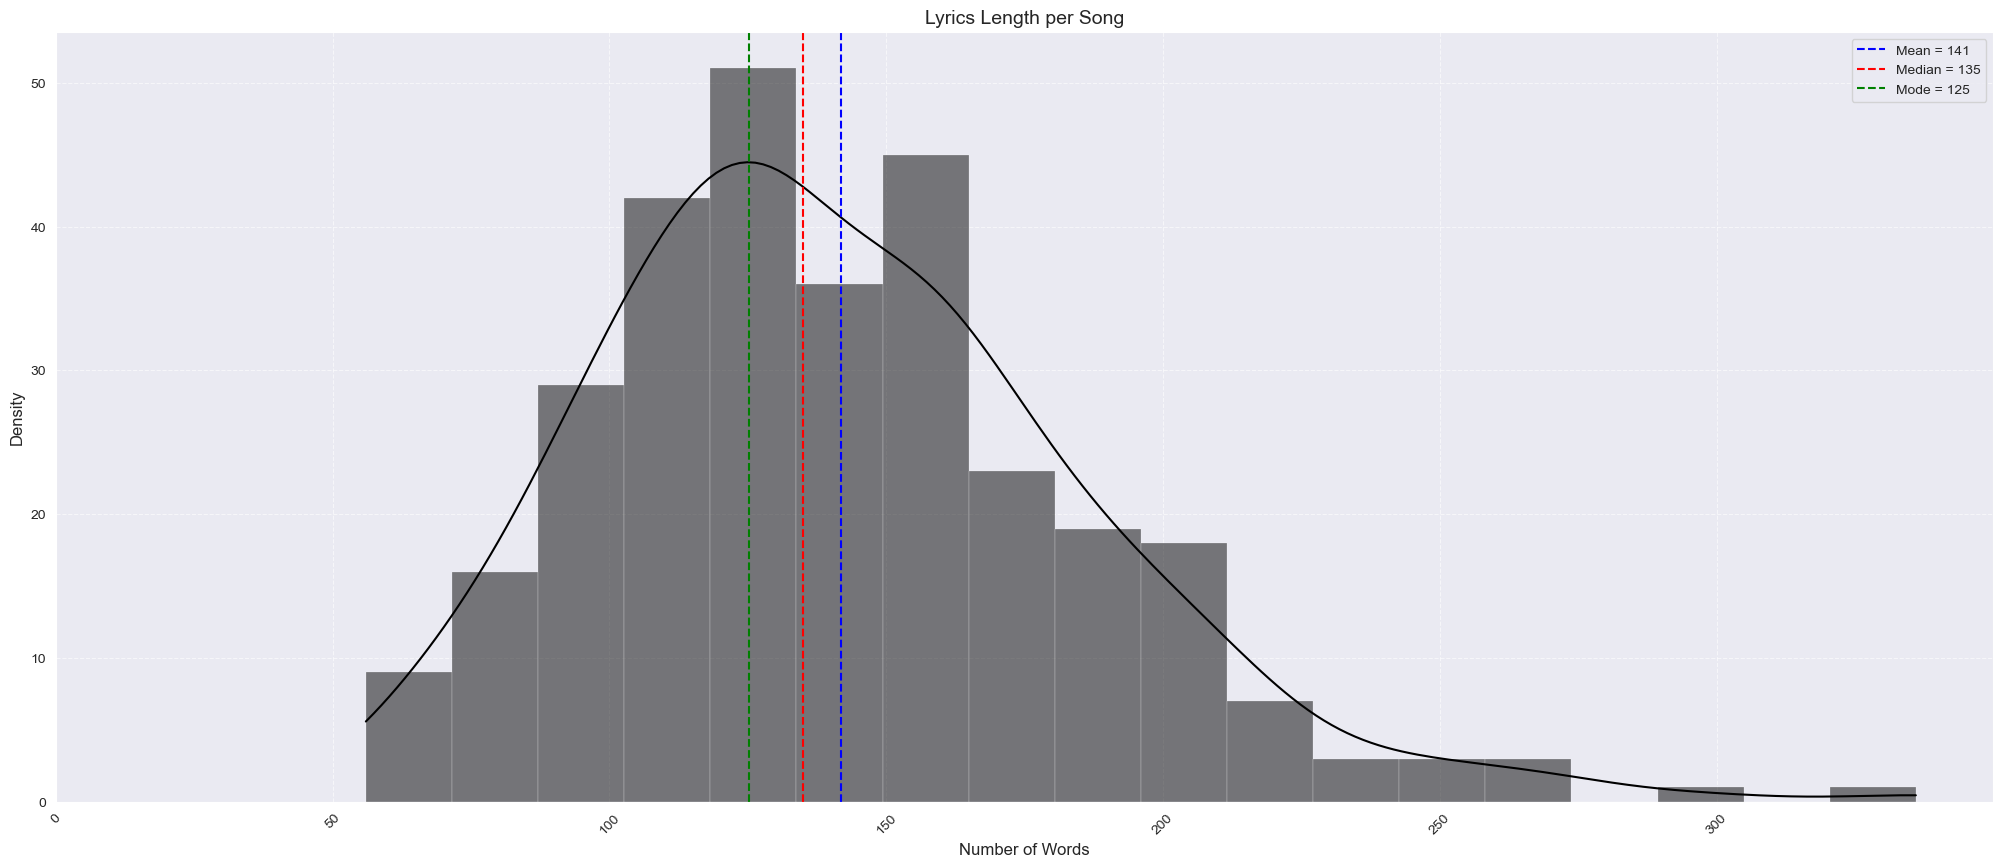

In [1294]:

# Plot histogram with density
plt.figure(figsize=(25, 10))
sns.histplot(lyrics_len_dist["num_words"], kde=True, color="black", linewidth=0.15)

# Add vertical lines for mean, median, and mode
plt.axvline(mean_count, color="blue", linestyle="dashed", label=f"Mean = {int(mean_count)}")
plt.axvline(median_count, color="red", linestyle="dashed", label=f"Median = {int(median_count)}")
plt.axvline(mode_count, color="green", linestyle="dashed", label=f"Mode = {int(mode_count)}")

# Customize the plot
plt.title("Lyrics Length per Song", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(np.arange(0, max(lyrics_len_dist["num_words"]), 50), rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

- It is apparent from the figure that the average lyrics length per song is 141 words.  
- The most typical lyrics length is about 125 words (the mode). 
- Finally, the median is 135 words.
- Since Mean > Median > Mode, the lyrics length distribution **is likely skewed to the right**.
- This means that while most songs are short (~125 words), some longer songs (~200+ words) are stretching the average upward.

Estimation using right-skewed normal as well as normal distributions.


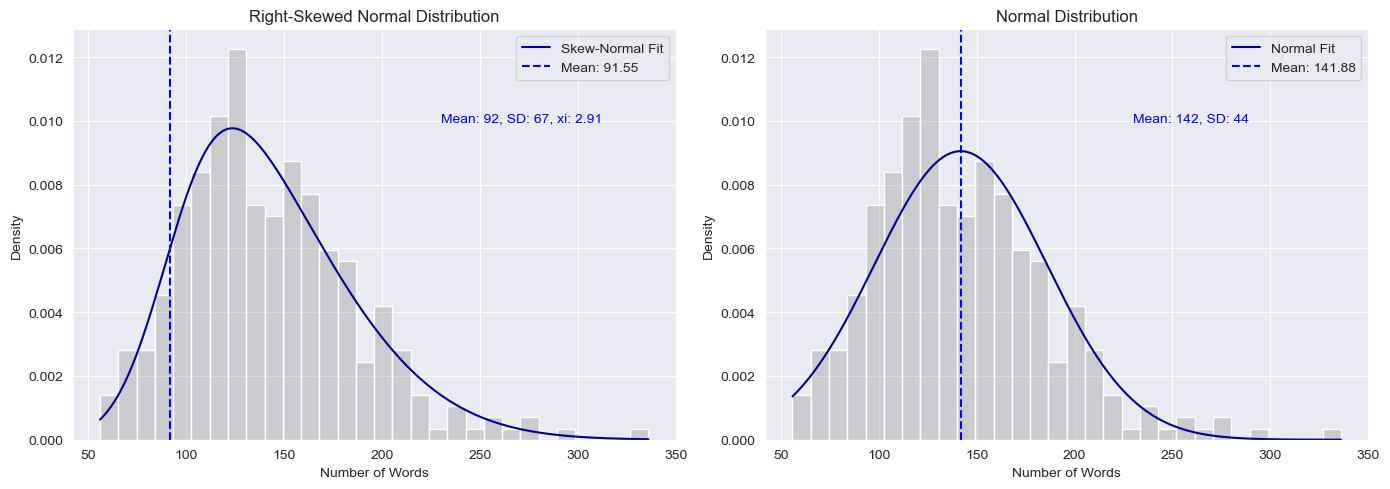

In [1295]:
# Assuming `lyrics_len_dist` DataFrame is available
num_words = lyrics_len_dist["num_words"]

# Fit to a normal distribution
normal_mean, normal_std = stats.norm.fit(num_words)  # Returns (mean, std)
 
# Fit to a right-skewed normal distribution
skew_xi, skew_mean, skew_std  = stats.skewnorm.fit(num_words)  # Returns (xi, mean, std)


# Function to generate density curves
x = np.linspace(num_words.min(), num_words.max(), 1000)
normal_pdf = stats.norm.pdf(x, loc=normal_mean, scale=normal_std)
skew_pdf = stats.skewnorm.pdf(x, skew_xi, loc=skew_mean, scale=skew_std)


# Plot Normal & Skewed Normal Distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Right-skewed normal distribution
sns.histplot(num_words, bins=30, kde=False, stat="density", color="gray", alpha=0.3, ax=axes[0])
axes[0].plot(x, skew_pdf, color="darkblue", label="Skew-Normal Fit")
axes[0].axvline(skew_mean, color="blue", linestyle="dashed", label=f"Mean: {skew_mean:.2f}")
axes[0].text(230, 0.01, f"Mean: {skew_mean:.0f}, SD: {skew_std:.0f}, xi: {skew_xi:.2f}", color="blue", fontsize=10)
axes[0].set_title("Right-Skewed Normal Distribution")
axes[0].set_xlabel("Number of Words")
axes[0].set_ylabel("Density")
axes[0].legend()

# Normal distribution
sns.histplot(num_words, bins=30, kde=False, stat="density", color="gray", alpha=0.3, ax=axes[1])
axes[1].plot(x, normal_pdf, color="darkblue", label="Normal Fit")
axes[1].axvline(normal_mean, color="blue", linestyle="dashed", label=f"Mean: {normal_mean:.2f}")
axes[1].text(230, 0.01, f"Mean: {normal_mean:.0f}, SD: {normal_std:.0f}", color="blue", fontsize=10)
axes[1].set_title("Normal Distribution")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()

plt.savefig("./lyrics_len_dist.pdf", dpi=1000, format="pdf", bbox_inches="tight")

plt.show()

It seems that right-skewed ditribution is better suited to fit the lyrics lengths data, as it was mentioned above.

In [1296]:
# Remove variables from memory
del lyrics_len_dist

### Studying word count per decade


This is done to see if the timeline of the career of Amr Diab has an effect on the length of her songs. For each decade we plot a histogram of the lengths of lyrics the for songs performed through that decade.

In [1297]:
# Group by Decade & Song, count words per song
full_word_count_decade = (songs_proc[['Song', 'Decade', 'Lyrics']]
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby(['Decade', 'Song'],as_index=False)  # Keep 'Decade' and 'Song' columns
    .agg(num_words=('num_words', 'first'))
)


In [1298]:
# Finding the longest song
max_s = full_word_count_decade["num_words"].max()
longest_song = full_word_count_decade[full_word_count_decade["num_words"] == max_s]
print("Longest song:\n")
longest_song

Longest song:



,Decade,Song,num_words
199,Late 1980s,ليلة,336


In [1299]:
# Finding the shortest song 
min_s = full_word_count_decade["num_words"].min()
shortest_song = full_word_count_decade[full_word_count_decade["num_words"] == min_s]
print("Shortest song:\n")
shortest_song

Shortest song:



,Decade,Song,num_words
46,Early 1990s,قلوب,56


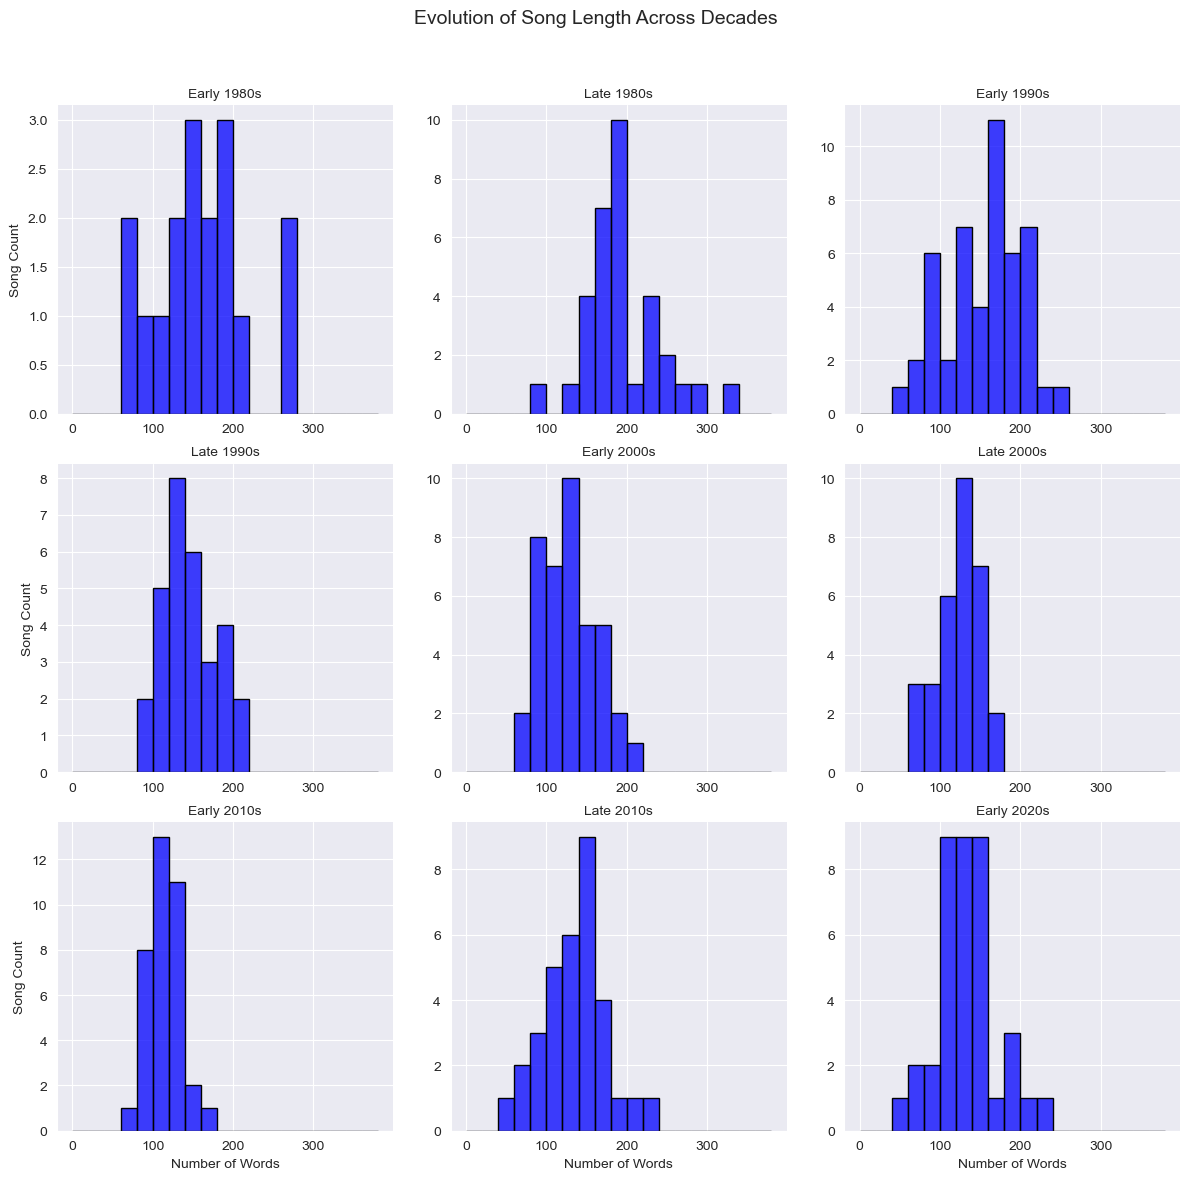

In [1300]:
# Ensure 'Decade' is a categorical column with the correct order
decade_order = ['Early 1980s', 'Late 1980s', 'Early 1990s', 'Late 1990s', 'Early 2000s', 'Late 2000s','Early 2010s','Late 2010s',  'Early 2020s']
full_word_count_decade['Decade'] = pd.Categorical(full_word_count_decade['Decade'], categories=decade_order, ordered=True)

# Seaborn FacetGrid for faceting by Decade
g = sns.FacetGrid(full_word_count_decade, col="Decade", col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.histplot, x="num_words", bins=np.arange(0, full_word_count_decade["num_words"].max() + 50, 20), color="blue", edgecolor="black")

# Ensure the directory exists
os.makedirs("./figs", exist_ok=True)

# Adjust plot styling
g.set_axis_labels("Number of Words", "Song Count")
g.set_titles(col_template="{col_name}")  # Titles for each subplot

plt.subplots_adjust(top=0.9)
plt.suptitle("Evolution of Song Length Across Decades", fontsize=14)
# Now save the figure
plt.savefig("./figs/full_word_count_decade.pdf", dpi=1000, format="pdf")
plt.show()


Note that in the claculation of lyrics lengths, the lyrics were preprocessed and stopwords were removed. So the length only includes the significant informative words in the song. 

From the histograms above, we observe that the majority of Amr Diab's songs have a word count below 200. However, there is a noticeable shift in song length across different decades.

1980s: Early in his career, songs varied in length but generally remained within the 100–200 word range.
1990s & 2000s: During his peak, songs became more structured, with a consistent pattern of word count clustering around 150–200 words. This period marks his dominance in the Arabic pop music scene, producing many of his most iconic songs.
2010s & 2020s: A trend towards shorter songs is evident, with most songs falling under 150 words. This aligns with the global shift in music consumption, where shorter, more concise tracks perform better on streaming platforms.
Interestingly, the longest song in the dataset appears in the early 2000s, while the shortest song is from the 2020s—possibly reflecting the influence of modern streaming trends and audience preferences for more compact musical content.

This trend suggests that Amr Diab adapted his songwriting approach over time, starting with more lyrically rich compositions in the 1980s and 1990s, before gradually shifting towards shorter and more commercially optimized songs in recent years.

To further analyze this shift, we will examine how his album releases, lyrical themes, and music style evolved across different periods of his career.

In [1301]:
# Step 1: Convert 'Year' column to numeric (handle missing values)
songs_proc["Year"] = pd.to_numeric(songs_proc["Year"], errors="coerce")

# Step 2: Separate known and unknown dates
unknown_dates = songs_proc[songs_proc["Year"].isna()].drop_duplicates()
known_dates = songs_proc[songs_proc["Year"].notna()].drop_duplicates()

# Step 3: Get the start and end year of the dataset
start_year = int(known_dates["Year"].min()) if not known_dates.empty else None
end_year = int(known_dates["Year"].max()) if not known_dates.empty else None

# Step 4: Filter songs by decade
decades = {
    "Early 1980s": (1980, 1984),
    "Late 1980s": (1985, 1989),
    "Early 1990s": (1990, 1994),
    "Late 1990s": (1995, 1999),
    "Early 2000s": (2000, 2004),
    "Late 2000s": (2005, 2009),
    "Early 2010s": (2010, 2014),
    "Late 2010s": (2015, 2019),
    "Early 2020s": (2020, 2025),
}

# Step 5: Print Summary
print(f"Period of songs from: {start_year} to {end_year}")

print(f"Number of songs with unknown date: {len(unknown_dates)} "
      f"which is {len(unknown_dates) / len(songs_proc) * 100:.2f}% of total songs.")

# Filter songs by decades
songs_by_decade = {}
for label, (start, end) in decades.items():
    songs_by_decade[label] = songs_proc[(songs_proc["Year"] >= start) & (songs_proc["Year"] <= end)]

# Print results
for decade, df in songs_by_decade.items():
    print(f"{decade}: {len(df)} songs")


Period of songs from: 1983 to 2023
Number of songs with unknown date: 0 which is 0.00% of total songs.
Early 1980s: 17 songs
Late 1980s: 33 songs
Early 1990s: 48 songs
Late 1990s: 31 songs
Early 2000s: 41 songs
Late 2000s: 32 songs
Early 2010s: 36 songs
Late 2010s: 33 songs
Early 2020s: 38 songs


C:\Users\Esraa\AppData\Local\Temp\ipykernel_21168\2721874986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_proc["Year"] = pd.to_numeric(songs_proc["Year"], errors="coerce")


Free up memory

In [1302]:
# Remove variables from memory
del full_word_count_decade
del unknown_dates
del known_dates
del songs_by_decade

# Force garbage collection to free up memory
gc.collect()


59785

In [1303]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy.stats as stats
import os

import gc  # Import garbage collector module

## **Data**

In [1304]:

# Define file paths
PREPROC_PATH = "data/amr_diab_songs_proc1.csv"
PREPROC_SW_PATH = "data/stop_words.txt"

In [1305]:
songs = pd.read_csv( PREPROC_PATH, header=0)
songs

,Year,Composer,Lyricist,Song,Lyrics,Decade,Composer_first_name,Composer_last_name,Lyricist_first_name,Lyricist_last_name
0,2023,محمد أحمد فؤاد,تامر حسين,بيوحشنا,"['ملازمنا', 'ملازمنا', 'خياله', 'وطيفه', 'فين'...",Early 2020s,محمد,أحمد فؤاد,تامر,حسين
1,2023,أحمد إبراهيم,أيمن بهجت قمر,معرفش حد بالأسم ده,"['اعرفش', 'بالاسم', 'انا', 'تاه', 'عقله', 'ولق...",Early 2020s,أحمد,إبراهيم,أيمن,بهجت قمر
2,2023,محمد يحيي,بهاء الدين محمد,ظبط مودها,"['تظبط', 'مودها', 'اطلب', 'حتي', 'عينيها', 'تا...",Early 2020s,محمد,يحيي,بهاء,الدين محمد
3,2023,محمد يحيي,محمد القاياتي,سلامك وصلي,"['سلامك', 'وصلي', 'واتاريني', 'واحشك', 'انت', ...",Early 2020s,محمد,يحيي,محمد,القاياتي
4,2023,محمد يحيي,محمد البوغة,واخدين راحتهم,"['واخذين', 'راحتهم', 'قاعدين', 'قلبي', 'مربعين...",Early 2020s,محمد,يحيي,محمد,البوغة
...,...,...,...,...,...,...,...,...,...,...
307,1983,هاني شنودة,هاني ذكي,الزمن,"['الزمن', 'بينسي', 'دايما', 'الزمن', 'مفيش', '...",Early 1980s,هاني,شنودة,هاني,ذكي
308,1983,هاني شنودة,عبد الرحيم منصور,نور يا ليل,"['نور', 'ليل', 'الاسرار', 'عشقناك', 'واحنا', '...",Early 1980s,هاني,شنودة,عبد,الرحيم منصور
309,1983,عزمي الكيلاني,عصام عبدالله,وقت وعشناه,"['وقت', 'وعشناه', 'انتي', 'وانا', 'جرح', 'حفرن...",Early 1980s,عزمي,الكيلاني,عصام,عبدالله
310,1983,ياسر عبد الحليم,عوض الرخاوي,أحلى دنيا,"['امتي', 'نشوف', 'البسمه', 'الحلوه', 'ماليه', ...",Early 1980s,ياسر,عبد الحليم,عوض,الرخاوي


## **Some High Level Statistical Aggregates of the Data**

Print out some preliminary information about the songs data file.

In [1306]:
# Print dataset statistics
print("Total number of songs in the dataset:", songs["Song"].nunique())

print("Total number of composers:", songs["Composer"].str.strip().nunique()) # set removes duplicates
print("Total number of lyricists:", songs["Lyricist"].str.strip().nunique())

# Assuming 'Word' contains processed words after removing stopwords
print("Total number of words in all lyrics (after removing stopwords):", songs["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum())
print("Total number of unique words in all lyrics (after removing stopwords):", songs["Lyrics"].apply(lambda lyrics: len(set(str(lyrics).split()))).sum()) 

Total number of songs in the dataset: 309
Total number of composers: 80
Total number of lyricists: 58
Total number of words in all lyrics (after removing stopwords): 43421
Total number of unique words in all lyrics (after removing stopwords): 13703


Remove unnecessary variables to free up storage.

In [1307]:
# Remove the variable 'songs' from memory
del songs

## **Some initial simple analysis to specific words**

Reading the csv file containing the songs (after preprocessing) in the form of comma separated file.

In [1308]:
# Load the preprocessed songs dataset
songs_proc = pd.read_csv( PREPROC_PATH,  header=0)

# Convert columns to appropriate types if needed
songs_proc


,Year,Composer,Lyricist,Song,Lyrics,Decade,Composer_first_name,Composer_last_name,Lyricist_first_name,Lyricist_last_name
0,2023,محمد أحمد فؤاد,تامر حسين,بيوحشنا,"['ملازمنا', 'ملازمنا', 'خياله', 'وطيفه', 'فين'...",Early 2020s,محمد,أحمد فؤاد,تامر,حسين
1,2023,أحمد إبراهيم,أيمن بهجت قمر,معرفش حد بالأسم ده,"['اعرفش', 'بالاسم', 'انا', 'تاه', 'عقله', 'ولق...",Early 2020s,أحمد,إبراهيم,أيمن,بهجت قمر
2,2023,محمد يحيي,بهاء الدين محمد,ظبط مودها,"['تظبط', 'مودها', 'اطلب', 'حتي', 'عينيها', 'تا...",Early 2020s,محمد,يحيي,بهاء,الدين محمد
3,2023,محمد يحيي,محمد القاياتي,سلامك وصلي,"['سلامك', 'وصلي', 'واتاريني', 'واحشك', 'انت', ...",Early 2020s,محمد,يحيي,محمد,القاياتي
4,2023,محمد يحيي,محمد البوغة,واخدين راحتهم,"['واخذين', 'راحتهم', 'قاعدين', 'قلبي', 'مربعين...",Early 2020s,محمد,يحيي,محمد,البوغة
...,...,...,...,...,...,...,...,...,...,...
307,1983,هاني شنودة,هاني ذكي,الزمن,"['الزمن', 'بينسي', 'دايما', 'الزمن', 'مفيش', '...",Early 1980s,هاني,شنودة,هاني,ذكي
308,1983,هاني شنودة,عبد الرحيم منصور,نور يا ليل,"['نور', 'ليل', 'الاسرار', 'عشقناك', 'واحنا', '...",Early 1980s,هاني,شنودة,عبد,الرحيم منصور
309,1983,عزمي الكيلاني,عصام عبدالله,وقت وعشناه,"['وقت', 'وعشناه', 'انتي', 'وانا', 'جرح', 'حفرن...",Early 1980s,عزمي,الكيلاني,عصام,عبدالله
310,1983,ياسر عبد الحليم,عوض الرخاوي,أحلى دنيا,"['امتي', 'نشوف', 'البسمه', 'الحلوه', 'ماليه', ...",Early 1980s,ياسر,عبد الحليم,عوض,الرخاوي



### Initial investigation using the keyword حب (love).

This is particularly chosen as Amr Diab is mostly famous for the romantic themes.

Extract all subwords containing the word "حب", including repetitions.

In [1309]:
# Define the keyword حب (Arabic for "love")
keyword = 'حب'  

# Filter rows where "Lyrics" contains the keyword and select only "Song" and "Lyrics" columns
songs_2_1 = songs_proc.loc[songs_proc["Lyrics"].str.contains(keyword, na=False)].copy()
songs_2_1["keyword = 'حب'"] = songs_2_1["Lyrics"].apply(lambda lyrics: [word for word in str(lyrics).split() if keyword in word])

songs_2_1

,Year,Composer,Lyricist,Song,Lyrics,Decade,Composer_first_name,Composer_last_name,Lyricist_first_name,Lyricist_last_name,keyword = 'حب'
0,2023,محمد أحمد فؤاد,تامر حسين,بيوحشنا,"['ملازمنا', 'ملازمنا', 'خياله', 'وطيفه', 'فين'...",Early 2020s,محمد,أحمد فؤاد,تامر,حسين,"['احب',, 'احب',]"
3,2023,محمد يحيي,محمد القاياتي,سلامك وصلي,"['سلامك', 'وصلي', 'واتاريني', 'واحشك', 'انت', ...",Early 2020s,محمد,يحيي,محمد,القاياتي,"['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',]"
5,2023,عمرو دياب,تامر حسين,مكانك,"['عارف', 'سنه', 'وانا', 'جنبك', 'بحلم', 'يجي',...",Early 2020s,عمرو,دياب,تامر,حسين,"['حبيت',, 'وصاحبتها',, 'حبنا',, 'حبيت',, 'حبيت..."
6,2023,عمرو دياب,تامر حسين,لوحدنا,"['شاغلنا', 'ناس', 'ومين', 'هاممنا', 'يتقال', '...",Early 2020s,عمرو,دياب,تامر,حسين,"['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيب..."
7,2023,محمد قماح,تامر حسين,الكلام ليك,"['الكلام', 'ليك', 'انت', 'انت', 'انت', 'اه', '...",Early 2020s,محمد,قماح,تامر,حسين,"['بحبك',, 'بحبك',, 'احب',, 'احب',, 'احب',, 'اح..."
...,...,...,...,...,...,...,...,...,...,...,...
306,1983,عزمي الكيلاني,عصام عبدالله,بحب الحياة,"['بحبك', 'لانك', 'عيون', 'الحياه', 'بشوف', 'بي...",Early 1980s,عزمي,الكيلاني,عصام,عبدالله,"[['بحبك',, 'بحبك',, 'حبيبتي',, 'حبيبتي',, 'بحب..."
307,1983,هاني شنودة,هاني ذكي,الزمن,"['الزمن', 'بينسي', 'دايما', 'الزمن', 'مفيش', '...",Early 1980s,هاني,شنودة,هاني,ذكي,"['صاحب',, 'صاحب',]"
309,1983,عزمي الكيلاني,عصام عبدالله,وقت وعشناه,"['وقت', 'وعشناه', 'انتي', 'وانا', 'جرح', 'حفرن...",Early 1980s,عزمي,الكيلاني,عصام,عبدالله,"['حبنا',, 'حبنا',, 'حبيبتي',, 'ياحبيبتي',, 'يا..."
310,1983,ياسر عبد الحليم,عوض الرخاوي,أحلى دنيا,"['امتي', 'نشوف', 'البسمه', 'الحلوه', 'ماليه', ...",Early 1980s,ياسر,عبد الحليم,عوض,الرخاوي,"['بتحب',, 'الحب',, 'الحب',, 'بتحب',, 'الحب',, ..."


In [1310]:
# Total occurrences of words containing the subword "حب" (with repetitions)
songs_with_keyword1 =  songs_2_1["keyword = 'حب'"].apply(lambda words: len(words))
songs_lyrics = songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split()))

total_occurrences =songs_with_keyword1.sum()
total_words = songs_lyrics.sum()

print(f"Total number of occurrences of words containing the subword حب (with repetitions) across all songs:")
print(total_occurrences)
print(f"Out of a total number of {total_words} words.")
print("Note that all these counts include repetitions.")
print(f"Percentage is: {(total_occurrences / total_words) * 100:.2f}%\n")

# Total occurrences of words containing the subword "حب" (without repetitions)
unique_occurrences =  len(set(songs_with_keyword1))
unique_total_words = len(set(songs_lyrics))

print(f"Total number of occurrences of words containing the subword حب (without repetitions) across all songs:")
print(unique_occurrences)
print(f"Out of a total number of {unique_total_words} unique words.")
print("Note that all these counts exclude repetitions.")
print(f"Percentage is: {(unique_occurrences / unique_total_words) * 100:.2f}%\n")

Total number of occurrences of words containing the subword حب (with repetitions) across all songs:
2182
Out of a total number of 43421 words.
Note that all these counts include repetitions.
Percentage is: 5.03%

Total number of occurrences of words containing the subword حب (without repetitions) across all songs:
31
Out of a total number of 133 unique words.
Note that all these counts exclude repetitions.
Percentage is: 23.31%



 This high percentage suggests that Amr Diab's songs were more focused on the romantic theme.


In [1311]:
# Number of songs with lyrics containing the subword "حب"
num_songs_with_keyword1 = songs_with_keyword1.count()
total_songs = songs_proc["Song"].nunique()

print("Number of songs with lyrics containing the subword حب:")
print(num_songs_with_keyword1)
print(f"Out of a total of: {total_songs} songs.")
print(f"Percentage is: {(num_songs_with_keyword1 / total_songs) * 100:.2f}%\n")

print("Songs with lyrics containing the subword حب:")
print(songs_2_1["Song"])  # Print song titles

Number of songs with lyrics containing the subword حب:
242
Out of a total of: 309 songs.
Percentage is: 78.32%

Songs with lyrics containing the subword حب:
0          بيوحشنا
3       سلامك وصلي
5            مكانك
6           لوحدنا
7       الكلام ليك
          ...     
306     بحب الحياة
307          الزمن
309     وقت وعشناه
310      أحلى دنيا
311    أحضان الجبل
Name: Song, Length: 242, dtype: object


Next we get a sample of the songs containing the subword حب (love) along with some information about the song and the corresponding inclusive words. The frequency column indicates the number of words in the corresponding song that
includes the subword حب (love).

In [1312]:
# Calculate word frequency per song
songs_2_1["Frequency"] = songs_2_1["keyword = 'حب'"].apply(lambda words: len(words))

# Keep only necessary columns and sort by frequency
songs_2_1 = songs_2_1[["Song","Lyrics", "Decade", "Composer", "Lyricist","keyword = 'حب'", "Frequency"]].sort_values(by="Frequency", ascending=False)

songs_2_1

,Song,Lyrics,Decade,Composer,Lyricist,keyword = 'حب',Frequency
104,حبينا,"['حبينا', 'حبينا', 'حبينا', 'حبينا', 'حبينا', ...",Late 1980s,وفاء حسين,رفعت الشريف,"[['حبينا',, 'حبينا',, 'حبينا',, 'حبينا',, 'حبي...",74
20,نور العين,"['حبيبي', 'نور', 'ساكن', 'خيالي', 'عاشق', 'بقا...",Late 1990s,ناصر المزداوي,أحمد شتا,"[['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبي...",57
241,حبيتها,"['وانا', 'قلبي', 'بقولها', 'حبيتها', 'حبيتها',...",Early 1990s,حجاج عبدالرحمن,مجدى النجار,"['حبيتها',, 'حبيتها',, 'حبيتها',, 'حبيتها',, '...",45
219,اه حبيبي,"['يملي', 'عينيا', 'الا', 'حبيبي', 'عايز', 'اعي...",Late 2010s,مديح محسن,هاني رجب,"['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيب...",42
306,بحب الحياة,"['بحبك', 'لانك', 'عيون', 'الحياه', 'بشوف', 'بي...",Early 1980s,عزمي الكيلاني,عصام عبدالله,"[['بحبك',, 'بحبك',, 'حبيبتي',, 'حبيبتي',, 'بحب...",34
...,...,...,...,...,...,...,...
129,انا عايش,"['برتاح', 'ليله', 'بنساك', 'لقيت', 'نهايه', 'ح...",Early 2000s,عمرو مصطفي,ربيع السيوفي,"['حبيتش',]",1
285,زيتوني,"['زيتوني', 'عيونك', 'سحروني', 'والله', 'عيونك'...",Late 1980s,يحيى عبد الله,مجدي النجار,"['يحب',]",1
246,لا لا,"['انا', 'شوفت', 'ياما', 'الدنيا', 'ياما', 'يام...",Late 2010s,عمرو طنطاوي,تامر حسين,"['حبتني',]",1
187,حلوة البدايات,"['حلوه', 'البدايات', 'حكايات', 'بسهر', 'وياك',...",Early 2020s,عمرو مصطفى,خالد تاج,"['حبك',]",1


Next we only select a smaller random sample of songs.


In [1313]:
n_samples = 20  # Number of random songs containing the word "حب" (love)

# Ungroup and randomly sample n_samples rows
songs_2_2 = songs_2_1.sample(n=n_samples, random_state=42)

In [1314]:
# Display the DataFrame with alternating row colors
songs_2_2.style.set_properties(**{'color': 'white'})

,Song,Lyrics,Decade,Composer,Lyricist,keyword = 'حب',Frequency
111,توبة,"['واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'شوفي', 'ازاي', 'اتغير', 'حالي', 'شوفي', 'ازاي', 'حبيبتي', 'بقيت', 'قلبي', 'ماعدش', 'القلب', 'الخالي', 'شوفتك', 'واتمنيت', 'شوفي', 'ازاي', 'اتغير', 'حالي', 'شوفي', 'ازاي', 'حبيبتي', 'بقيت', 'قلبي', 'ماعدش', 'القلب', 'الخالي', 'شوفتك', 'واتمنيت', 'اتمنيت', 'قلبي', 'تكوني', 'احلي', 'عروسه', 'تشوفها', 'عيوني', 'اتمنيت', 'قلبي', 'تكوني', 'احلي', 'عروسه', 'تشوفها', 'عيوني', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'واهي', 'مره', 'وعدت', 'وخلاص', 'حبينا', 'بصدق', 'واخلاص', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'حبيتك', 'تفكير', 'حبيتك', 'والقلب', 'اختار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'بحرك', 'ياما', 'عمت', 'كتير', 'وغرقت', 'اخر', 'المشوار', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'واهي', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه', 'توبه']",Late 1980s,عمرو دياب,مجدي النجار,"[""'حبينا',"", ""'حبينا',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبينا',"", ""'حبينا',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيبتي',"", ""'حبيبتي',"", ""'حبينا',"", ""'حبينا',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',"", ""'حبيتك',""]",20
301,عصافير الحب,"['عصافير', 'الحب', 'مالت', 'وقالتلي', 'كلام', 'وطارت', 'عصافير', 'الحب', 'مالت', 'وقالتلي', 'كلام', 'وطارت', 'وباينه', 'عليكي', 'اه', 'ام', 'رمش', 'سايب', 'اه', 'ام', 'رمش', 'سايب', 'وانا', 'اقول', 'ايه', 'الحكايه', 'هيمانه', 'ورايحه', 'جايه', 'وانا', 'اقول', 'ايه', 'الحكايه', 'هيمانه', 'ورايحه', 'جايه', 'سرحانه', 'غنايا', 'غنايا', 'سرحانه', 'غنايا', 'غنايا', 'اتاريه', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اتاريه', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اتاريه', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اه', 'ام', 'رمش', 'سايب', 'اه', 'ليلي', 'ياني', 'الحب', 'الاولاني', 'اه', 'ليلي', 'ياني', 'الحب', 'الاولاني', 'بيخلي', 'الحب', 'اه', 'ويخلي', 'الاه', 'اغاني', 'اه', 'ليلي', 'ياني', 'الحب', 'الاولاني', 'اه', 'ليلي', 'ياني', 'الحب', 'الاولاني', 'بيخلي', 'الحب', 'اه', 'ويخلي', 'الاه', 'اغاني', 'شوفي', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'شوفي', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'شوفي', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اه', 'ام', 'رمش', 'سايب', 'عصافير', 'الحب', 'قالت', 'سور', 'قلبك', 'كذبه', 'دابت', 'عصافير', 'الحب', 'قالت', 'سور', 'قلبك', 'كذبه', 'دابت', 'اول', 'نسمه', 'فاتت', 'اول', 'نسمه', 'فاتت', 'دوب', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'دوب', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'دوب', 'الحب', 'جالك', 'طيرلك', 'عقل', 'بالك', 'اه', 'ام', 'رمش', 'سايب', 'عينيكي', 'الحب', 'باين', 'الوان', 'الجناين', 'عينيكي', 'الحب', 'باين', 'الوان', 'الجناين', 'قلبك', 'عمال', 'بيضحك', 'ويسمع', 'المداين', 'عينيكي', 'الحب', 'باين', 'الوان', 'الجناين', 'عينيكي', 'الحب', 'باين', 'الوان', 'الجناين', 'قلبك', 'عمال', 'بيضحك', 'ويسمع', 'المداين', 'الحب', 'جالك', 'طي

Free up memory


In [1315]:
del songs_2_1
del songs_2_2


## !!!REDO FOR OTHER WORDS!!!

## **Temporal Rate of Singing Performance**


In this subsection we study the evolution of the songing activity in terms of the number of songs produced per year as a fine scale and per decade as a more coarse scale.

C:\Users\Esraa\AppData\Local\Temp\ipykernel_21168\3301225845.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


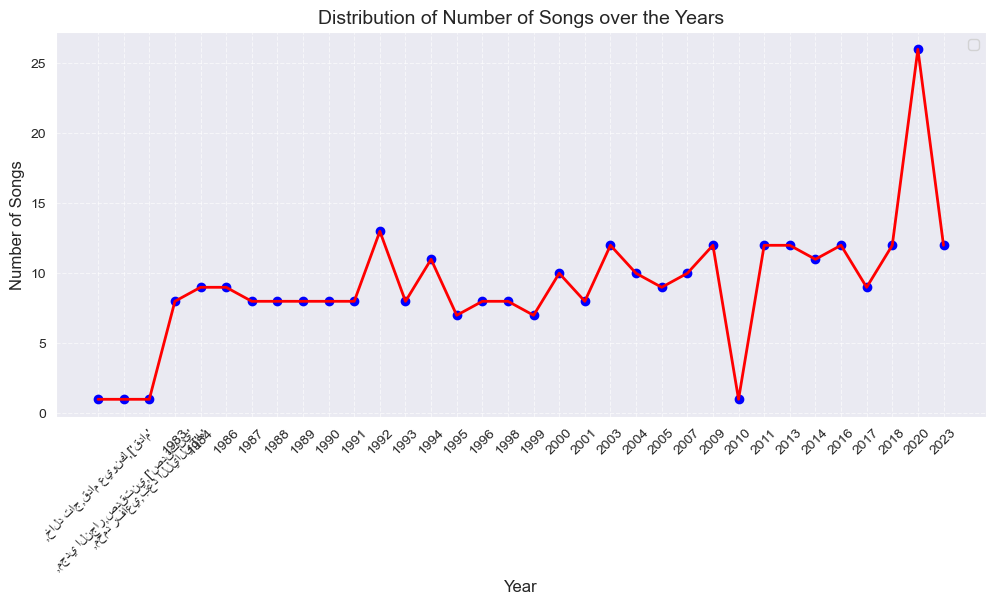

In [1316]:
# Select distinct song-year pairs and count the number of songs per year
songs_freq = (songs_proc[['Year', 'Song']]
              .groupby('Year', as_index=False)
              .agg(num_songs=('Song', 'count'))
              .sort_values(by=['Year']))

x = songs_freq['Year']
y = songs_freq['num_songs']

plt.figure(figsize=(12, 5))
# Create scatter plot
plt.scatter(x, y, color='blue', marker='o')
plt.plot(x, y, color='red', linestyle='-', linewidth=2)  # Line connecting points


# Add labels and title
plt.title("Distribution of Number of Songs over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()

#save plot
plt.savefig("songs_distribution.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()

- As shown a in the plot, the 1990s and 2000s seem to have consistent song production.
- There are some high-output years where the number of songs significantly increases like in 2020 which is most likely where his top hits where created.
- A noticeable drop of song production in 2010 may be due to the circumstances of the country back then  


In [1317]:
del songs_freq

## !!!SKIP TO LINE 515!!! (comparison)

## **Text Mining**

**Text mining** can also be thought of as text analytics. The goal is to discover relevant information that is possibly unknown or hidden in the text. **Natural Language Processing** (NLP) is one methodology that can be used in mining text. It tries to decipher the ambiguities 
and complications in written language by tokenization, clustering, extracting entity and word relationships, and using algorithms to identify themes and quantify subjective information. We will begin by breaking down the concept of **lexical complexity**.

Lexical complexity can be described by a combination of these measures: 
- Word frequency: number of words per song. 
- Word length: average length of individual words in the songs lyrics. 
- Lexical diversity: number of unique words used in the song vocabulary. 
- Lexical density: the number of unique words divided by the total number of words (word repetition).

### Studying word frequency

In music, individual word frequencies carry a great deal of significance, whether it be repetition or rarity. 

Both cases affect **memorability** of the entire song itself. One important goal of lyrics analysis, as well as for songwriter, is to know whether there is a *correlation between word frequency and hit songs*. So we take the tidy format one step further and get a summarized count of words per song.


Here we consider all words in the song's lyrics as opposed to just distinct words.


In [1318]:
full_word_count = (songs_proc
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby("Song", as_index=False)
    .agg(num_words=('num_words', 'first'), Year=('Year', 'first'), 
         Composer=('Composer', 'first'), Lyricist=('Lyricist', 'first'))
    .sort_values(by="num_words", ascending=False)
)


In [1319]:
# Select the topmost rows based on word count
full_word_count.head(15)

,Song,num_words,Year,Composer,Lyricist
209,ليلة,336,1988,خليل مصطفى,محمد البنا
222,ماله,298,1986,عبد الرحيم شاهين,عبد الرحيم شاهين
161,عصافير الحب,273,1984,سيف الدولة حمدان,عصام عبدالله
189,قمر,272,1989,رياض الهمشري,عادل عمر
44,إيش حال الشجرة,265,1984,محمد الشيخ,عبد الرحيم منصور
115,خالصين,254,1987,خليل مصطفى,رضا أمين
103,حبيبي,252,1991,عمرو دياب,مجدي النجار
194,كده كده,248,1989,رياض الهمشري,محمد فضل
247,مية مية,239,1986,عمرو دياب,مجدي النجار
93,توبة,236,1988,عمرو دياب,مجدي النجار


In [1320]:
# Select the topmost rows based on word count
full_word_count.tail(15)

,Song,num_words,Year,Composer,Lyricist
57,الله على حبك,74,2009,عمرو مصطفى,مجدي النجار
272,وحیاتي خلیكي,72,2009,عمرو طنطاوي,عبد المنعم طه
14,أشوف عينيكي,72,1984,تراث,عصام عبدالله
104,حبيبي يا عمري,70,2003,بهاء الدين محمد,خالد عز
7,يا ليلة,68,1984,طارق مدكور,ناصر رشوان
126,ذكريات,67,1994,عمرو دياب,مجدي النجار
24,أنا حر,67,1992,عمرو دياب,مدحت العدل
73,بالضحكة دي,66,2020,عزيز الشافعي,عزيز الشافعي
180,قالي الوداع,63,2003,خالد عز,بهاء الدين محمد
238,مكانك,58,2023,عمرو دياب,تامر حسين


note that most of the longest songs of Amr Diab were created in the 80's by the Lyricist Magdy El Naggar.
This may be due to the fact that the 80s, music was primarily distributed via cassettes and vinyl records, where albums often had a few long songs rather than many short tracks or that many songs from that period relied heavily on orchestras and live performances, which naturally led to longer arrangements with instrumental interludes.

also note that the shortest songs were created recently which shows that people today, especially younger listeners, have shorter attention spans due to social media and fast-paced digital content.

In [1321]:
# Ensure "Year" is treated as numeric
songs_proc["Year"] = pd.to_numeric(songs_proc["Year"], errors="coerce")

# Drop or fill missing values
songs_proc = songs_proc.dropna(subset=["Year"])  # Drop rows with missing years
songs_proc["Year"] = songs_proc["Year"].astype(int)  # Convert to integer

# Now, perform filtering
songs_80s = songs_proc[(songs_proc["Year"] >= 1980) & (songs_proc["Year"] <= 1989)]
lyrics_count_80s = songs_80s["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()

songs_2000s = songs_proc[(songs_proc["Year"] >= 2000) & (songs_proc["Year"] <= 2025)]
lyrics_count_2000 = songs_2000s["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()

# Print results
print(f"Number of songs in the 80's: {songs_80s['Song'].nunique()}")
print(f"Lyrics count in the 80's: {lyrics_count_80s} , average: {lyrics_count_80s/songs_80s['Song'].nunique()} words per song")

print(f"Number of songs in the 2000's: {songs_2000s['Song'].nunique()}")
print(f"Lyrics count in the 2000's: {lyrics_count_2000} , average: {lyrics_count_2000/songs_2000s['Song'].nunique()} words per song")


Number of songs in the 80's: 50
Lyrics count in the 80's: 9121 , average: 182.42 words per song
Number of songs in the 2000's: 178
Lyrics count in the 2000's: 22579 , average: 126.84831460674157 words per song


C:\Users\Esraa\AppData\Local\Temp\ipykernel_21168\2297237909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_proc["Year"] = songs_proc["Year"].astype(int)  # Convert to integer


these numbers prove the difference in the listening habits between the people back in the 80's and people now

In [1322]:
n_words = songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()
n_unique_words = songs_proc["Lyrics"].apply(lambda lyrics: len(set(str(lyrics).split()))).sum()

print(f"Total number of words: {n_words}")
print(f"Total number of unique words: {n_unique_words}")
print(f"Percentage of unique words: {(n_unique_words / n_words) * 100:.2f}%")

# Free up memory
del full_word_count

Total number of words: 43418
Total number of unique words: 13700
Percentage of unique words: 31.55%


### Studying word count distribution

Here we study the lyrics lengths over the whole career of Amr Diab. We show a histogram overlaid with kernel density curve for the distribution of lengths for songs.

In [1323]:
lyrics_len_dist = (songs_proc[['Song', 'Lyrics']]
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby('Song', as_index=False)  # Keep 'Song' column
    .agg(num_words=('num_words', 'first'))  # Keep num_words
)

# Function to estimate mode using kernel density estimation 
def estimate_mode(x):
    kde = gaussian_kde(x)
    x_grid = np.linspace(min(x), max(x), 1000)
    return x_grid[np.argmax(kde(x_grid))]

# Compute statistics
mean_count = lyrics_len_dist['num_words'].mean()
median_count = lyrics_len_dist['num_words'].median()
mode_count = estimate_mode(lyrics_len_dist['num_words'])

# Print results
print(f"Mean: {mean_count}")
print(f"Median: {median_count}")
print(f"Mode (estimated): {mode_count}")

Mean: 141.87908496732027
Median: 135.0
Mode (estimated): 125.22922922922923


In [1324]:
lyrics_len_dist

,Song,num_words
0,ايوة اتغيرت,125
1,شكرا,199
2,كان كل حاجة,118
3,يا سمرة,145
4,يا ليلة,68
...,...,...
301,يصعب علينا,185
302,يهمك في إيه,88
303,يو منهم,110
304,يوم تلات,119


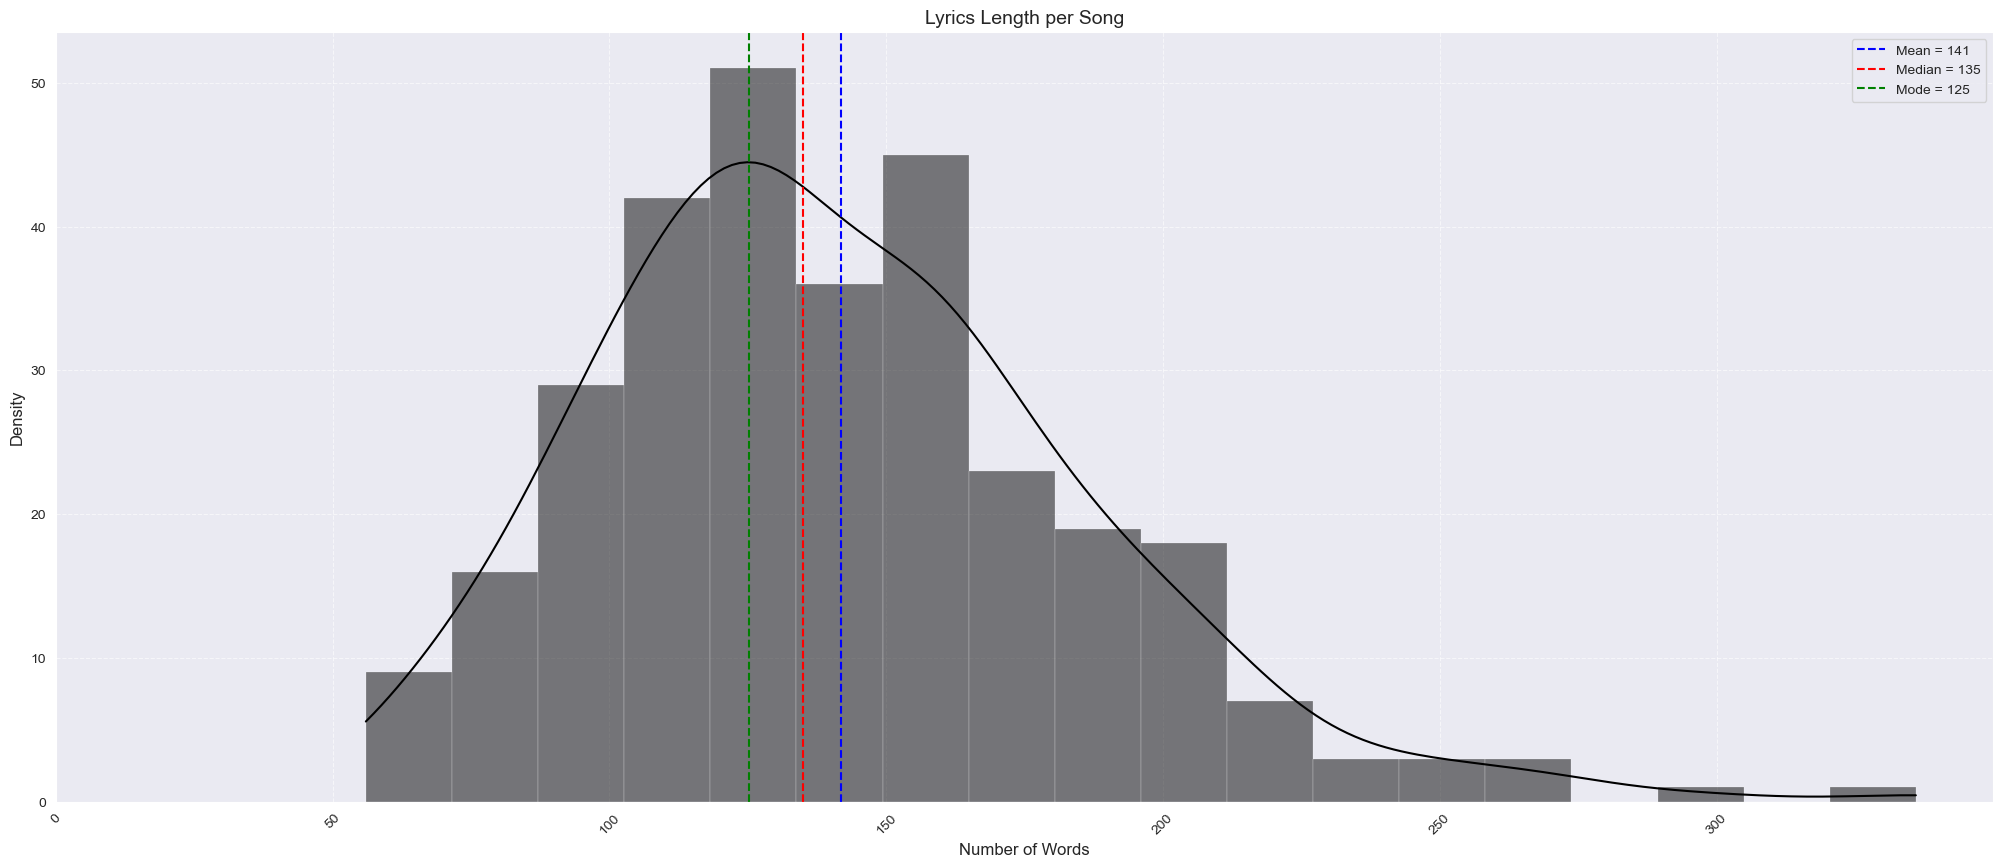

In [1325]:

# Plot histogram with density
plt.figure(figsize=(25, 10))
sns.histplot(lyrics_len_dist["num_words"], kde=True, color="black", linewidth=0.15)

# Add vertical lines for mean, median, and mode
plt.axvline(mean_count, color="blue", linestyle="dashed", label=f"Mean = {int(mean_count)}")
plt.axvline(median_count, color="red", linestyle="dashed", label=f"Median = {int(median_count)}")
plt.axvline(mode_count, color="green", linestyle="dashed", label=f"Mode = {int(mode_count)}")

# Customize the plot
plt.title("Lyrics Length per Song", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(np.arange(0, max(lyrics_len_dist["num_words"]), 50), rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

- It is apparent from the figure that the average lyrics length per song is 141 words.  
- The most typical lyrics length is about 125 words (the mode). 
- Finally, the median is 135 words.
- Since Mean > Median > Mode, the lyrics length distribution **is likely skewed to the right**.
- This means that while most songs are short (~125 words), some longer songs (~200+ words) are stretching the average upward.

Estimation using right-skewed normal as well as normal distributions.


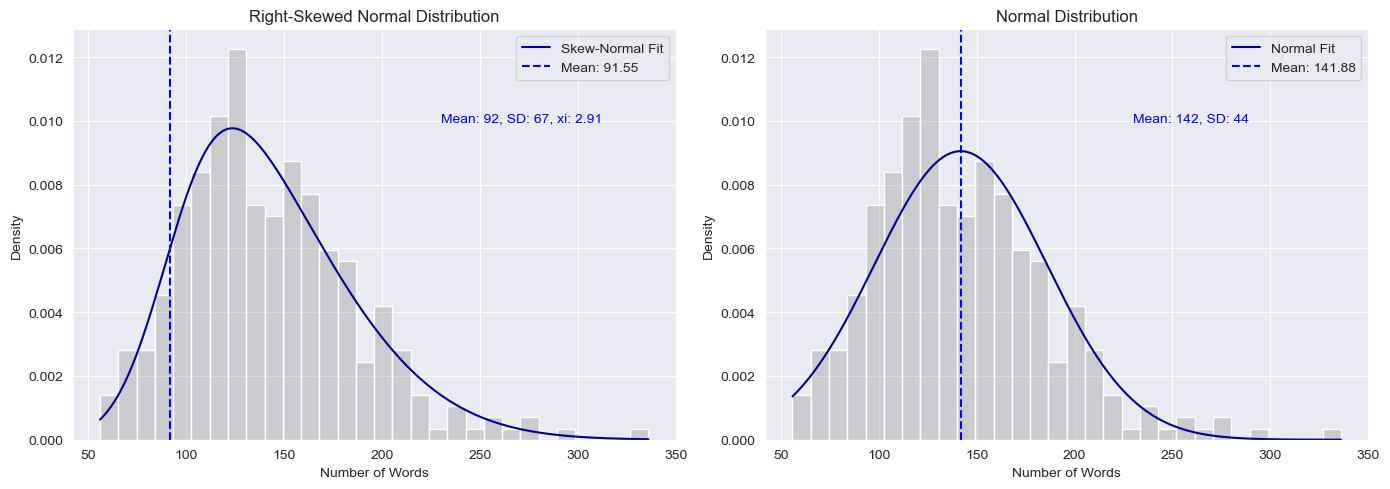

In [1326]:
# Assuming `lyrics_len_dist` DataFrame is available
num_words = lyrics_len_dist["num_words"]

# Fit to a normal distribution
normal_mean, normal_std = stats.norm.fit(num_words)  # Returns (mean, std)
 
# Fit to a right-skewed normal distribution
skew_xi, skew_mean, skew_std  = stats.skewnorm.fit(num_words)  # Returns (xi, mean, std)


# Function to generate density curves
x = np.linspace(num_words.min(), num_words.max(), 1000)
normal_pdf = stats.norm.pdf(x, loc=normal_mean, scale=normal_std)
skew_pdf = stats.skewnorm.pdf(x, skew_xi, loc=skew_mean, scale=skew_std)


# Plot Normal & Skewed Normal Distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Right-skewed normal distribution
sns.histplot(num_words, bins=30, kde=False, stat="density", color="gray", alpha=0.3, ax=axes[0])
axes[0].plot(x, skew_pdf, color="darkblue", label="Skew-Normal Fit")
axes[0].axvline(skew_mean, color="blue", linestyle="dashed", label=f"Mean: {skew_mean:.2f}")
axes[0].text(230, 0.01, f"Mean: {skew_mean:.0f}, SD: {skew_std:.0f}, xi: {skew_xi:.2f}", color="blue", fontsize=10)
axes[0].set_title("Right-Skewed Normal Distribution")
axes[0].set_xlabel("Number of Words")
axes[0].set_ylabel("Density")
axes[0].legend()

# Normal distribution
sns.histplot(num_words, bins=30, kde=False, stat="density", color="gray", alpha=0.3, ax=axes[1])
axes[1].plot(x, normal_pdf, color="darkblue", label="Normal Fit")
axes[1].axvline(normal_mean, color="blue", linestyle="dashed", label=f"Mean: {normal_mean:.2f}")
axes[1].text(230, 0.01, f"Mean: {normal_mean:.0f}, SD: {normal_std:.0f}", color="blue", fontsize=10)
axes[1].set_title("Normal Distribution")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()

plt.savefig("./lyrics_len_dist.pdf", dpi=1000, format="pdf", bbox_inches="tight")

plt.show()

It seems that right-skewed ditribution is better suited to fit the lyrics lengths data, as it was mentioned above.

In [1327]:
# Remove variables from memory
del lyrics_len_dist

### Studying word count per decade


This is done to see if the timeline of the career of Amr Diab has an effect on the length of her songs. For each decade we plot a histogram of the lengths of lyrics the for songs performed through that decade.

In [1328]:
# Group by Decade & Song, count words per song
full_word_count_decade = (songs_proc[['Song', 'Decade', 'Lyrics']]
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby(['Decade', 'Song'],as_index=False)  # Keep 'Decade' and 'Song' columns
    .agg(num_words=('num_words', 'first'))
)


In [1329]:
# Finding the longest song
max_s = full_word_count_decade["num_words"].max()
longest_song = full_word_count_decade[full_word_count_decade["num_words"] == max_s]
print("Longest song:\n")
longest_song

Longest song:



,Decade,Song,num_words
199,Late 1980s,ليلة,336


In [1330]:
# Finding the shortest song 
min_s = full_word_count_decade["num_words"].min()
shortest_song = full_word_count_decade[full_word_count_decade["num_words"] == min_s]
print("Shortest song:\n")
shortest_song

Shortest song:



,Decade,Song,num_words
46,Early 1990s,قلوب,56


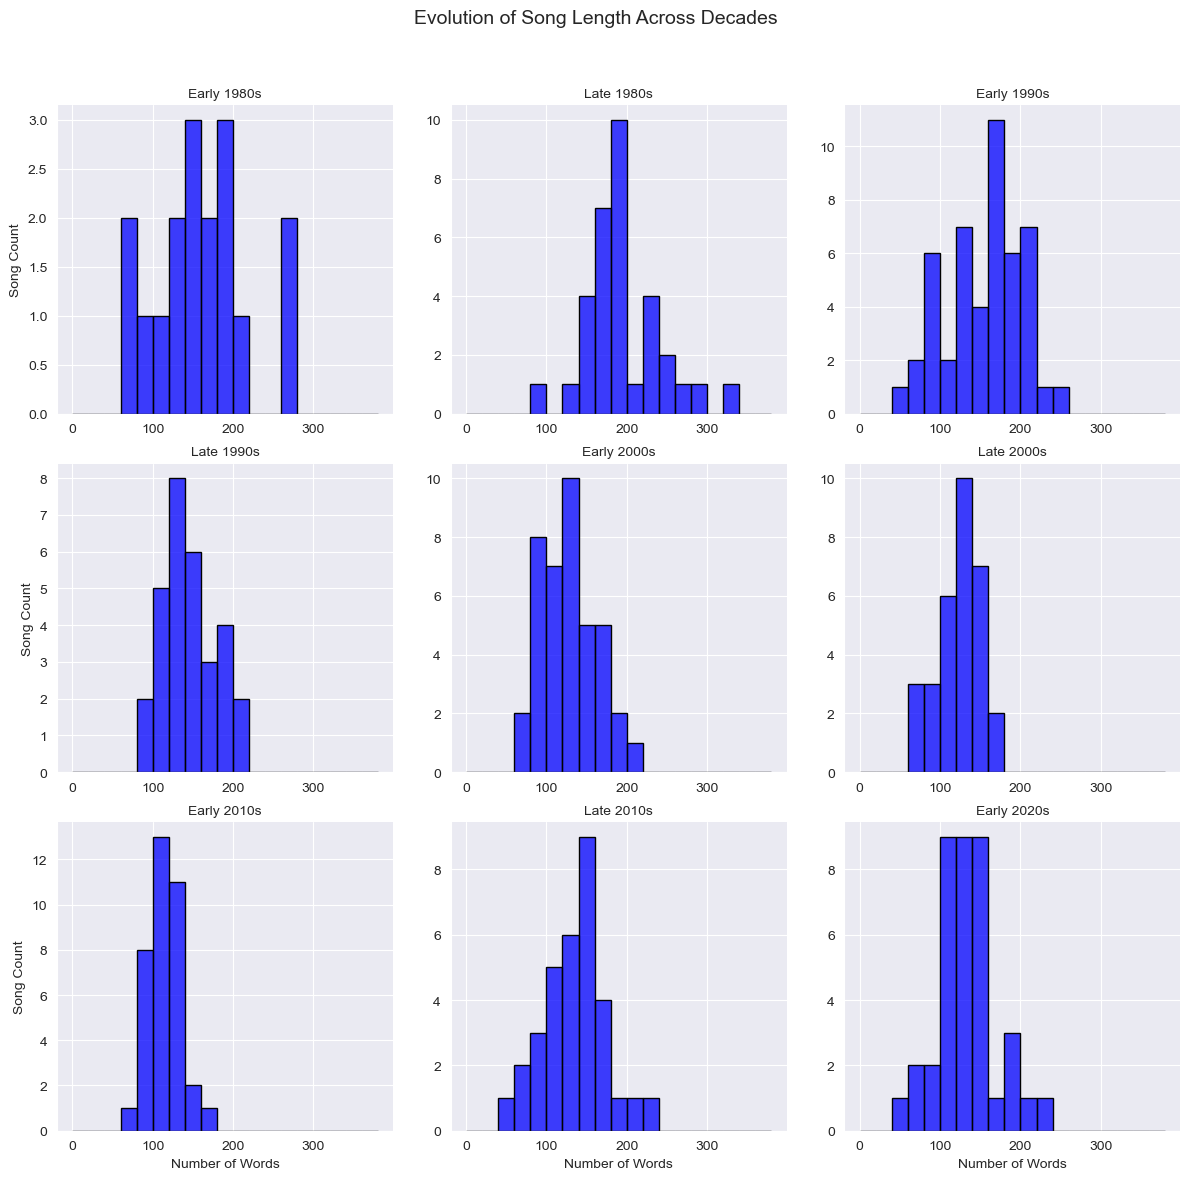

In [1331]:
# Ensure 'Decade' is a categorical column with the correct order
decade_order = ['Early 1980s', 'Late 1980s', 'Early 1990s', 'Late 1990s', 'Early 2000s', 'Late 2000s','Early 2010s','Late 2010s',  'Early 2020s']
full_word_count_decade['Decade'] = pd.Categorical(full_word_count_decade['Decade'], categories=decade_order, ordered=True)

# Seaborn FacetGrid for faceting by Decade
g = sns.FacetGrid(full_word_count_decade, col="Decade", col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.histplot, x="num_words", bins=np.arange(0, full_word_count_decade["num_words"].max() + 50, 20), color="blue", edgecolor="black")

# Ensure the directory exists
os.makedirs("./figs", exist_ok=True)

# Adjust plot styling
g.set_axis_labels("Number of Words", "Song Count")
g.set_titles(col_template="{col_name}")  # Titles for each subplot

plt.subplots_adjust(top=0.9)
plt.suptitle("Evolution of Song Length Across Decades", fontsize=14)
# Now save the figure
plt.savefig("./figs/full_word_count_decade.pdf", dpi=1000, format="pdf")
plt.show()


Note that in the claculation of lyrics lengths, the lyrics were preprocessed and stopwords were removed. So the length only includes the significant informative words in the song. 

From the histograms above, we observe that the majority of Amr Diab's songs have a word count below 200. However, there is a noticeable shift in song length across different decades.

1980s: Early in his career, songs varied in length but generally remained within the 100–200 word range.
1990s & 2000s: During his peak, songs became more structured, with a consistent pattern of word count clustering around 150–200 words. This period marks his dominance in the Arabic pop music scene, producing many of his most iconic songs.
2010s & 2020s: A trend towards shorter songs is evident, with most songs falling under 150 words. This aligns with the global shift in music consumption, where shorter, more concise tracks perform better on streaming platforms.
Interestingly, the longest song in the dataset appears in the early 2000s, while the shortest song is from the 2020s—possibly reflecting the influence of modern streaming trends and audience preferences for more compact musical content.

This trend suggests that Amr Diab adapted his songwriting approach over time, starting with more lyrically rich compositions in the 1980s and 1990s, before gradually shifting towards shorter and more commercially optimized songs in recent years.

To further analyze this shift, we will examine how his album releases, lyrical themes, and music style evolved across different periods of his career.

In [1332]:
# Step 1: Convert 'Year' column to numeric (handle missing values)
songs_proc["Year"] = pd.to_numeric(songs_proc["Year"], errors="coerce")

# Step 2: Separate known and unknown dates
unknown_dates = songs_proc[songs_proc["Year"].isna()].drop_duplicates()
known_dates = songs_proc[songs_proc["Year"].notna()].drop_duplicates()

# Step 3: Get the start and end year of the dataset
start_year = int(known_dates["Year"].min()) if not known_dates.empty else None
end_year = int(known_dates["Year"].max()) if not known_dates.empty else None

# Step 4: Filter songs by decade
decades = {
    "Early 1980s": (1980, 1984),
    "Late 1980s": (1985, 1989),
    "Early 1990s": (1990, 1994),
    "Late 1990s": (1995, 1999),
    "Early 2000s": (2000, 2004),
    "Late 2000s": (2005, 2009),
    "Early 2010s": (2010, 2014),
    "Late 2010s": (2015, 2019),
    "Early 2020s": (2020, 2025),
}

# Step 5: Print Summary
print(f"Period of songs from: {start_year} to {end_year}")

print(f"Number of songs with unknown date: {len(unknown_dates)} "
      f"which is {len(unknown_dates) / len(songs_proc) * 100:.2f}% of total songs.")

# Filter songs by decades
songs_by_decade = {}
for label, (start, end) in decades.items():
    songs_by_decade[label] = songs_proc[(songs_proc["Year"] >= start) & (songs_proc["Year"] <= end)]

# Print results
for decade, df in songs_by_decade.items():
    print(f"{decade}: {len(df)} songs")


Period of songs from: 1983 to 2023
Number of songs with unknown date: 0 which is 0.00% of total songs.
Early 1980s: 17 songs
Late 1980s: 33 songs
Early 1990s: 48 songs
Late 1990s: 31 songs
Early 2000s: 41 songs
Late 2000s: 32 songs
Early 2010s: 36 songs
Late 2010s: 33 songs
Early 2020s: 38 songs


C:\Users\Esraa\AppData\Local\Temp\ipykernel_21168\2721874986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_proc["Year"] = pd.to_numeric(songs_proc["Year"], errors="coerce")


Free up memory

In [1333]:
# Remove variables from memory
del full_word_count_decade
del unknown_dates
del known_dates
del songs_by_decade

# Force garbage collection to free up memory
gc.collect()


52112

popular words

Here we do a simple evaluation of the most frequently used words in the full set of lyrics.

In [1334]:
import pandas as pd
import ast  # More secure than eval()

# Load dataset (if not already loaded)
# songs_proc = pd.read_csv("your_file.csv", encoding="utf-8")

# Convert 'Lyrics' from a string representation to actual lists safely
def safe_eval(val):
    if isinstance(val, str):  
        try:
            return ast.literal_eval(val)  
        except (ValueError, SyntaxError):  
            return []
    return []

# Apply the function
songs_proc["Lyrics"] = songs_proc["Lyrics"].apply(safe_eval)

# Flatten all words into a single list
all_words = [word for lyrics in songs_proc["Lyrics"] for word in lyrics]

# Create a DataFrame with word counts
top_words = (pd.DataFrame(all_words, columns=["Word"])
             .value_counts()
             .reset_index(name="word_freq")
             .nlargest(20, "word_freq")  
             .sort_values("word_freq", ascending=False)  
             .reset_index(drop=True))  

# Display results
print(top_words)


      Word  word_freq
0      انا       1258
1    حبيبي        753
2     قلبي        725
3      ايه        544
4      علي        404
5       اه        390
6      انت        365
7     الله        352
8     ليله        289
9    والله        256
10    وانا        252
11    عمري        244
12  الدنيا        230
13    معاك        212
14    وانت        204
15    انتي        198
16     ليل        185
17    خلاص        176
18    ياما        170
19   عينيا        141


C:\Users\Esraa\AppData\Local\Temp\ipykernel_21168\1094441142.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_proc["Lyrics"] = songs_proc["Lyrics"].apply(safe_eval)


Columns in top_words: Index(['Word', 'word_freq'], dtype='object')
Updated columns: Index(['Word', 'word_freq'], dtype='object')


C:\Users\Esraa\AppData\Local\Temp\ipykernel_21168\1986183904.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word_freq", y="Word", data=top_words, palette="viridis")


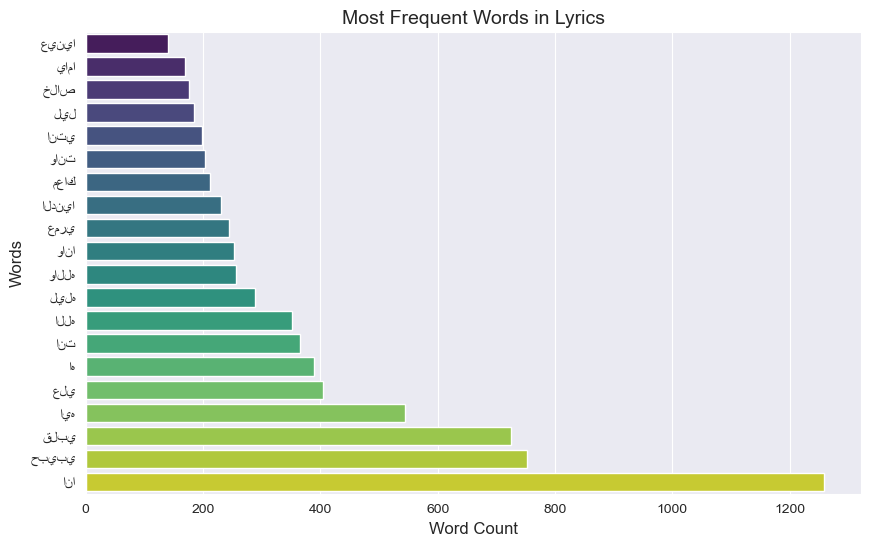

In [1343]:
import seaborn as sns
import matplotlib.pyplot as plt

# Debug column names
print("Columns in top_words:", top_words.columns)

# Remove duplicate columns
top_words = top_words.loc[:, ~top_words.columns.duplicated()]
print("Updated columns:", top_words.columns)

# Rename columns if necessary
top_words = top_words.rename(columns={"count": "word_freq", "text": "Word"})

# Ensure "Word" and "word_freq" exist
if "Word" not in top_words.columns or "word_freq" not in top_words.columns:
    raise ValueError("Required columns 'Word' and 'word_freq' are missing in top_words DataFrame.")

# Convert "word_freq" to numeric
top_words["word_freq"] = pd.to_numeric(top_words["word_freq"], errors="coerce")

# Sort DataFrame
top_words = top_words.sort_values(by="word_freq", ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="word_freq", y="Word", data=top_words, palette="viridis")
plt.title("Most Frequent Words in Lyrics", fontsize=14)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.yticks(fontsize=10)
plt.show()

The top figure studies the significance of word tokens from the perspective of their frequency of occurrence in the whole corpus of lyrics. More rigorous means of studying words significance will be described later below.
As can be seen, the most frequent word is "حبيبي"(my love/my darling). This can be attributed to the fact that "love" is essential in almost all genres of Egyptian culture. 
It caries romantic feelings, as well as nationalistic, religious, and spiritual emotions. It is worth observing that the word "الله" (ALLAH/GOD) appears in the top list twice, the second time with the conjunctive "and" as "والله"(and ALLAH).
The pair of appearances if counted together will boost it to the top of the list indicating that amr diab, even though predominantely romantic singer, always carry a spiritual attitudes in her songs.


Other top words that have romantic meanings include "قلبي" (my heart). 
Some other words are very generic such as "الدنيا" (The Word) and "ليله" (a night); their intended themes need to be studied 
in a more n-gram context.



Several other words in the list such as "انا" (I) and "اىه" (what) are mostly stopwords that are missed from our stopwords database. That is why we have used a list of top 20 words instead of the intended 10 words in order to account for that kind of noise.
